In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False

In [25]:
column_name=['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg','os','battery_capacity','storage','screen_size']

# names = ['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg']
xy_1 = pd.read_table('ZZ0715GuangFa_Samples100000_FeatureData.txt',names=column_name)
xy_1.head()

,id,target,card_type,netlong,owner_city,arpu,out_prdct_fee,prdct_fee,point_fee,myth_fee,...,age,adis,arpu_avg,myth_fee_avg,out_prdct_fee_avg,prdct_fee_avg,os,battery_capacity,storage,screen_size
0,13001325828,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13003828437,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13005536182,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13012652830,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13017603030,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
xy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103304 entries, 0 to 103303
Data columns (total 36 columns):
id                   103304 non-null int64
target               103304 non-null int64
card_type            102376 non-null float64
netlong              38928 non-null float64
owner_city           102375 non-null object
arpu                 58023 non-null float64
out_prdct_fee        58023 non-null float64
prdct_fee            58023 non-null float64
point_fee            58023 non-null float64
myth_fee             58023 non-null float64
brand                59588 non-null object
listing_date         58921 non-null float64
listing_price        56718 non-null float64
nettime              38928 non-null object
user_level           40065 non-null float64
sex                  40642 non-null float64
family_client        5992 non-null float64
group_client         5012 non-null float64
music                4477 non-null float64
expirationtime       4095 non-null object
video_member     

In [27]:
plt.style.use('bmh')
plt.rc('font',family = 'SimHei',size = 13)
#cat_list = ['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg']
cat_list=column_name
for n,i in enumerate(cat_list):
    xy_1_cat_num = xy_1[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,xy_1_cat_num))

1.id特征的类型数量是：99999
2.target特征的类型数量是：2
3.card_type特征的类型数量是：6
4.netlong特征的类型数量是：60
5.owner_city特征的类型数量是：279
6.arpu特征的类型数量是：13581
7.out_prdct_fee特征的类型数量是：4067
8.prdct_fee特征的类型数量是：2654
9.point_fee特征的类型数量是：9158
10.myth_fee特征的类型数量是：154
11.brand特征的类型数量是：606
12.listing_date特征的类型数量是：973
13.listing_price特征的类型数量是：543
14.nettime特征的类型数量是：37706
15.user_level特征的类型数量是：8
16.sex特征的类型数量是：2
17.family_client特征的类型数量是：1
18.group_client特征的类型数量是：1
19.music特征的类型数量是：1
20.expirationtime特征的类型数量是：4094
21.video_member特征的类型数量是：1
22.other_tv特征的类型数量是：1
23.finance特征的类型数量是：1
24.bank特征的类型数量是：1
25.campus_client特征的类型数量是：1
26.migu_tv特征的类型数量是：1
27.age特征的类型数量是：51
28.adis特征的类型数量是：1
29.arpu_avg特征的类型数量是：51764
30.myth_fee_avg特征的类型数量是：378
31.out_prdct_fee_avg特征的类型数量是：16952
32.prdct_fee_avg特征的类型数量是：7912
33.os特征的类型数量是：10
34.battery_capacity特征的类型数量是：407
35.storage特征的类型数量是：128
36.screen_size特征的类型数量是：68


In [28]:
# 去除重复行：
xy_1.drop_duplicates(keep='first',inplace=True)
xy_1.reset_index(inplace=True)

(103304, 37)

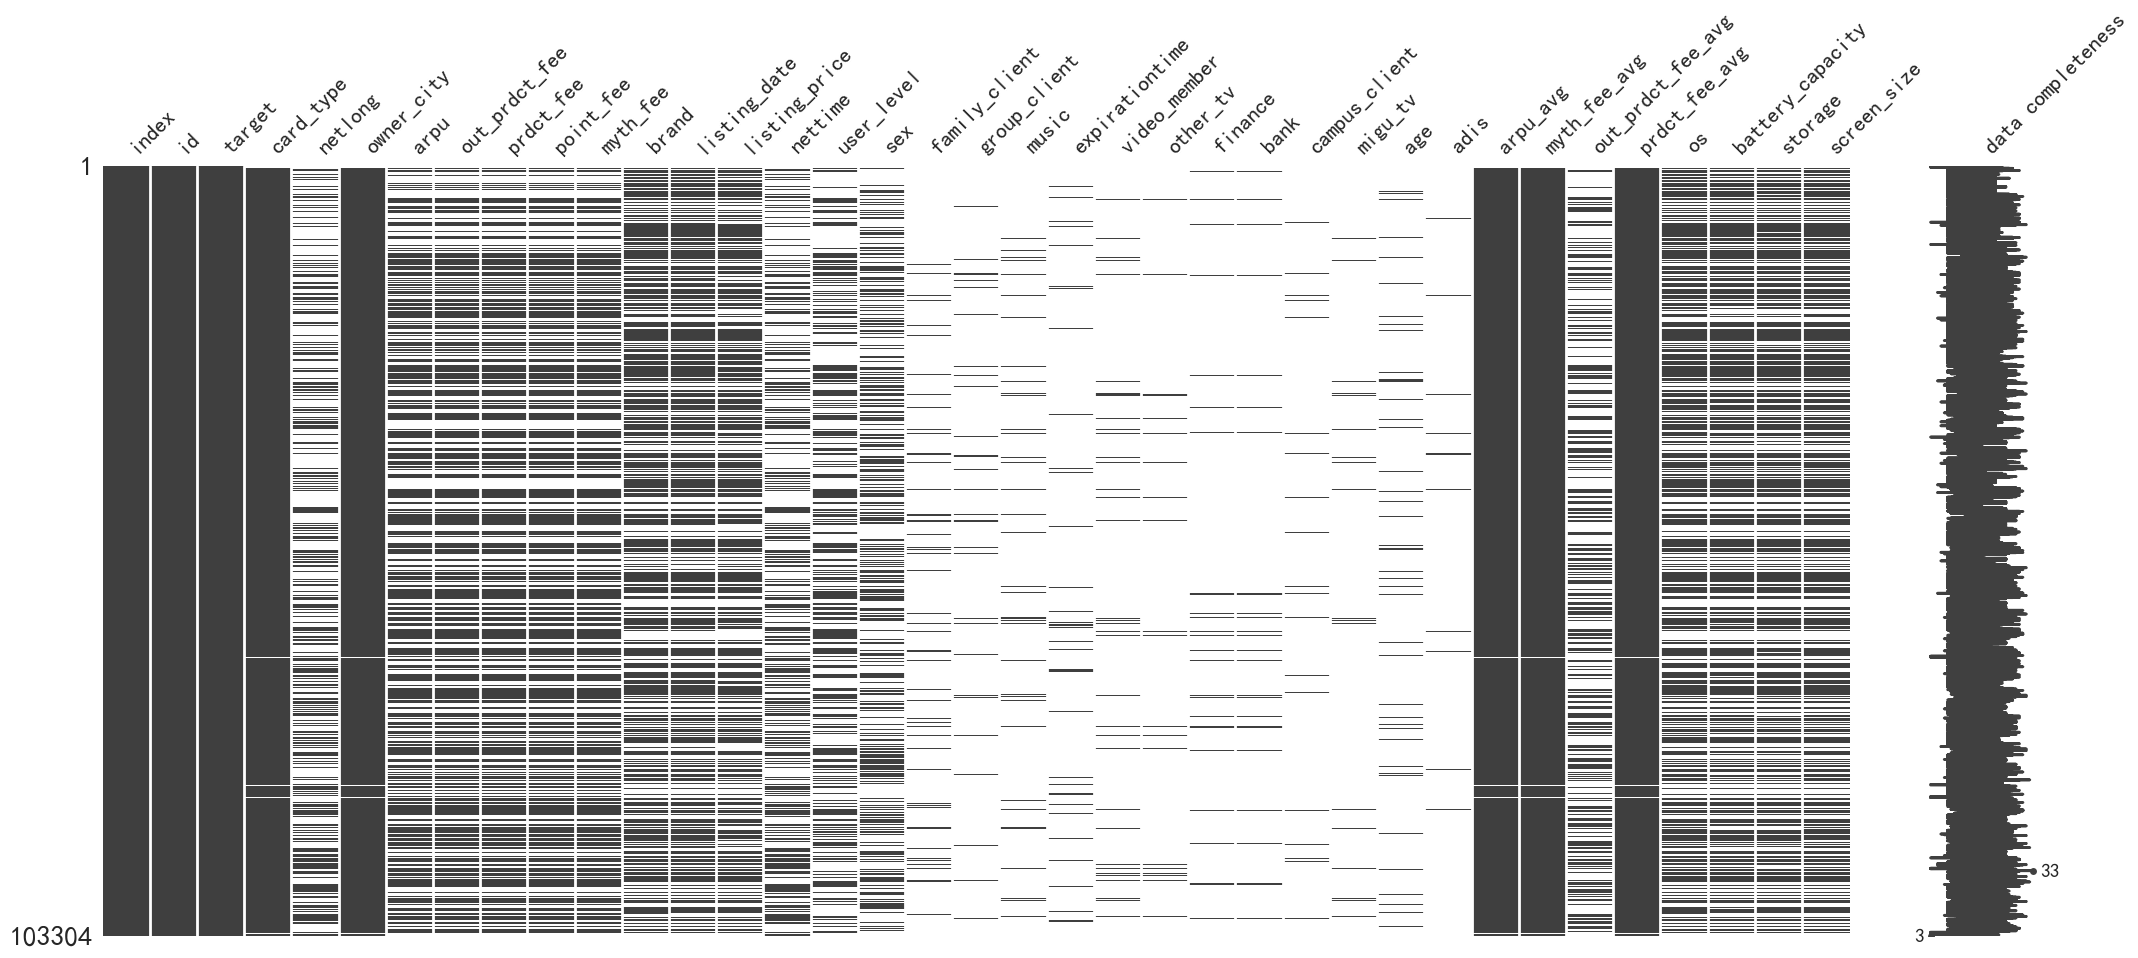

In [29]:
msno.matrix(xy_1,labels = True)
xy_1.shape

In [30]:
pandas_profiling.ProfileReport(xy_1)

Number of variables,37
Number of observations,103304
Total Missing (%),53.8%
Total size in memory,29.2 MiB
Average record size in memory,296.0 B
Numeric,17
Categorical,6
Boolean,11
Date,0
Text (Unique),0
Rejected,3


In [38]:
#根据手机上市时间衍生出，上市到现在的累计月份变量listing_data_months
#核心代码，转换，array转换成str使用[:]，转换成int加减
def month_sept(data):
    lst1=[]
    for n in range(len(data)):
        a=data.loc[n]['listing_date']
        if '2019' in str(a):
            month_num = str(a)[4:6]
            lst1.append(month_num)
        elif '2018' in str(a):
            month_num = 12-int(str(a)[4:6])+4
            lst1.append(month_num)
        elif( '2017' in str(a)) and (str(a)!='2017.0'):
            month_num = 12-int(str(a)[4:6])+4+12
            lst1.append(month_num)
        elif '2016' in str(a)and (str(a)!='2016.0'):
            month_num = 12-int(str(a)[4:6])+4+24
            lst1.append(month_num)
        elif '2015' in str(a)and (str(a)!='2015.0'):
            month_num = 12-int(str(a)[4:6])+4+36
            lst1.append(month_num)
        elif '2014' in str(a)and (str(a)!='2014.0'):
            month_num = 12-int(str(a)[4:6])+4+48
            lst1.append(month_num)
        elif '2013' in str(a) and(str(a)!='2013.0'):
            month_num = 12-int(str(a)[4:6])+4+60
            lst1.append(month_num)
    c= pd.concat([xy_1,pd.DataFrame(lst1)],axis=1)
    c.rename(columns={0:'listing_data_months'},inplace = True)
    return c
xy_2 = month_sept(xy_1)

In [39]:
xy_3 = pd.read_table('city_ranking.txt',names = ['owner_city','owner_city_level'])
xy_5 = pd.merge(xy_2,xy_3,on='owner_city',how = 'left')
xy_5.columns

Index(['index', 'id', 'target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'myth_fee', 'brand',
       'listing_date', 'listing_price', 'nettime', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'expirationtime',
       'video_member', 'other_tv', 'finance', 'bank', 'campus_client',
       'migu_tv', 'age', 'adis', 'arpu_avg', 'myth_fee_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'os', 'battery_capacity',
       'storage', 'screen_size', 'listing_data_months', 'owner_city_level'],
      dtype='object')

In [47]:
usefulcolumnlist=['target','arpu','arpu_avg','battery_capacity','brand','card_type','listing_price','myth_fee','netlong','os','out_prdct_fee','out_prdct_fee_avg','point_fee','prdct_fee','prdct_fee_avg','screen_size','sex','storage','user_level','listing_data_months','owner_city_level',]

xy_6 = xy_5[usefulcolumnlist]


In [48]:
xy_6['battery_capacity'].value_counts()

def DealBatteryFormat(RowSeriers):
    import re
    if RowSeriers.battery_capacity!=RowSeriers.battery_capacity:
        return 9999
    else:
        Battery = RowSeriers.battery_capacity
        Batterynum = re.findall('\d+',Battery)[0]
        return int(Batterynum)

xy_6['battery_capacity']=xy_6.apply(DealBatteryFormat,axis=1)

In [49]:
xy_6['battery_capacity'].value_counts().head()

9999    46209
3000     7693
4000     4138
2000     3095
1715     2049
Name: battery_capacity, dtype: int64

In [50]:
def DealstorageFormat(RowSeriers):
    storagestr=str(RowSeriers.storage)
   
    if 'G' in storagestr:
        storagesplit=storagestr.split('/')[0]
        if 'G' in storagesplit:
            
            return storagesplit.split('G')[0]+'GB'
        else:            
            return storagesplit+'GB'
    if 'M' in storagestr:
        storagesplit=storagestr.split('/')[0]
        if 'M' in storagesplit:
            return storagesplit.split('M')[0]+'MB'
        else:
            return storagesplit+'MB'
    else:
        return storagestr    

xy_6['storage']=xy_6.apply(DealstorageFormat,axis=1)
xy_6['battery_capacity'].value_counts()/len(xy_6['battery_capacity'])

9999       0.447311
3000       0.074470
4000       0.040057
2000       0.029960
1715       0.019835
2900       0.019312
2400       0.016292
3100       0.015450
1800       0.015324
2200       0.015227
4100       0.011945
3050       0.011849
3010       0.011529
3075       0.011142
2850       0.010919
1900       0.010793
2750       0.010290
2500       0.010087
2300       0.009758
2910       0.009245
2550       0.008625
2600       0.008306
1960       0.008170
1500       0.008160
2350       0.006534
3340       0.006418
3200       0.006244
800        0.006234
2930       0.004947
2100       0.004404
             ...   
6010       0.000010
2370       0.000010
3290       0.000010
2130       0.000010
2430       0.000010
9501320    0.000010
2010       0.000010
4660       0.000010
2515       0.000010
280        0.000010
2110       0.000010
400        0.000010
7200       0.000010
1780       0.000010
2670       0.000010
870        0.000010
4650       0.000010
3560       0.000010
3550       0.000010


In [51]:
# xy_6['finance'].value_counts()
# xy_6['finance'] = xy_6['finance'].fillna(9999)
# xy_6['finance'].value_counts()

# xy_6['bank'].value_counts()
# xy_6['bank'] = xy_6['bank'].fillna(9999)
# xy_6['bank'].value_counts()

# xy_6['owner_city'].value_counts()
# xy_6['owner_city'] = xy_6['owner_city'].fillna(9999)
# xy_6['owner_city'].value_counts()

xy_6['card_type'].value_counts()
xy_6['card_type'] = xy_6['card_type'].fillna(9999)
xy_6['card_type'].value_counts()

xy_6['netlong'].value_counts()
xy_6['netlong'] = xy_6['netlong'].fillna(9999)
xy_6['netlong'].value_counts()

# arpu 空值填充为999 ，异常值处理
xy_6['arpu'].value_counts()
xy_6['arpu'].describe()
xy_6['arpu'][xy_6['arpu']>500].value_counts()#u+1.5标准差3000
#xy_6['arpu'][xy_6['arpu']>500] = 41.82#中位数替换异常值
xy_6['arpu'] = xy_6['arpu'].fillna(9999)
xy_6['arpu'].value_counts()
# arpu_avg
xy_6['arpu_avg'].value_counts()#空值填充为999 ，异常值处理
xy_6['arpu_avg'].describe()
xy_6['arpu_avg'][xy_6['arpu_avg']>3000].value_counts()#u+1.5标准差3000
#xy_6['arpu_avg'][xy_6['arpu_avg']>3000] = 43.54#中位数替换异常值
xy_6['arpu_avg'] = xy_6['arpu_avg'].fillna(9999)
xy_6['arpu_avg'].value_counts()

# out_prdct_fee 空值填充为999，异常值处理,Nan没超过30%，按时0值超过了50%，直接构造成（空，0，大于0三类）
xy_6['out_prdct_fee'].value_counts()
xy_6['out_prdct_fee'].describe()
xy_6['out_prdct_fee'][xy_6['out_prdct_fee']>0] = 1
xy_6['out_prdct_fee'] = xy_6['out_prdct_fee'].fillna(9999)
xy_6['out_prdct_fee'].value_counts()
# out_prdct_fee_avg Nan超过30%，直接构造成（空，0，大于0三类）
xy_6['out_prdct_fee_avg'].value_counts()
xy_6['out_prdct_fee_avg'].describe()
xy_6['out_prdct_fee_avg'][xy_6['out_prdct_fee_avg']>0] = 1
xy_6['out_prdct_fee_avg'] = xy_6['out_prdct_fee_avg'].fillna(9999)
xy_6['out_prdct_fee_avg'].value_counts()

# prdct_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['prdct_fee'].value_counts()
# xy_6 = xy_6.drop(xy_6['prdct_fee'][xy_6['prdct_fee']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
# xy_6['prdct_fee'].describe()
xy_6['prdct_fee'][xy_6['prdct_fee']>500].value_counts()#中位数替换异常值
#xy_6['prdct_fee'][xy_6['prdct_fee']>500] = 23
xy_6['prdct_fee'] = xy_6['prdct_fee'].fillna(9999)
xy_6['prdct_fee'].value_counts()
# prdct_fee_avg空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['prdct_fee_avg'].value_counts()
# xy_6 = xy_6.drop(xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
xy_6['prdct_fee_avg'].describe()
xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500].value_counts()#中位数替换异常值
#xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500] = 24.6
xy_6['prdct_fee_avg'] = xy_6['prdct_fee_avg'].fillna(9999)
xy_6['prdct_fee_avg'].value_counts()

# point_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值（27824）超过50%，构造（空，0，大于0三类）
xy_6['point_fee'].value_counts()
xy_6['point_fee'][xy_6['point_fee']>0] = 1
xy_6['point_fee'] = xy_6['point_fee'].fillna(9999)
xy_6['point_fee'].value_counts()

# sex 构造3类
xy_6['sex'].value_counts()
xy_6['sex'] = xy_6['sex'].fillna(9999)
xy_6['sex'].value_counts()

# # family_client Nan超过30%，构造（空，1两类）
# xy_6['family_client'].value_counts()
# xy_6['family_client'] = xy_6['family_client'].fillna(9999)
# xy_6['family_client'].value_counts()

# # group_client  Nan超过30%，构造（空，1两类）
# xy_6['group_client'].value_counts()
# xy_6['group_client'] = xy_6['group_client'].fillna(9999)
# xy_6['group_client'].value_counts()

# # music  Nan超过30%，构造（空，1两类）
# xy_6['music'].value_counts()
# xy_6['music'] = xy_6['music'].fillna(9999)
# xy_6['music'].value_counts()

# # video_member Nan超过30%，构造（空，1两类）
# xy_6['video_member'].value_counts()
# xy_6['video_member'][xy_6['video_member'].notnull()] = 1
# xy_6['video_member'] = xy_6['video_member'].fillna(9999)
# xy_6['video_member'].value_counts()


# listing_data_months 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['listing_data_months'].value_counts()
xy_6['listing_data_months'] = xy_6['listing_data_months'].fillna(9999)
xy_6['listing_data_months'].value_counts()

# user_level  空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['user_level'].value_counts()
xy_6['user_level'] = xy_6['user_level'].fillna(9999)
xy_6['user_level'].value_counts()

# listing_price 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['listing_price'].value_counts()
xy_6['listing_price'] = xy_6['listing_price'].fillna(9999)
xy_6['listing_price'].value_counts()

# brand 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['brand'].value_counts()
xy_6['brand'] = xy_6['brand'].fillna(9999)
xy_6['brand'].value_counts()

# owner_city_level
xy_6['owner_city_level'].value_counts()
xy_6['owner_city_level'] = xy_6['owner_city_level'].fillna(9999)
xy_6['owner_city_level'].value_counts()
#以上，异常值，空值处理完毕

xy_6['brand'].value_counts()
xy_6['brand'][xy_6['brand']==9999] = '空值'
xy_6['brand'][~xy_6['brand'].isin(['vivo','OPPO','苹果','小米','华为','华为荣耀','三星','金立','酷派','魅族','空值'])] ='其它品牌'
xy_6['brand'].value_counts()

# ['battery_capacity','storage','screen_size']
xy_6['battery_capacity'] = xy_6['battery_capacity'].fillna(9999)
xy_6['battery_capacity'].value_counts()
# xy_6['battery_capacity'][xy_6['battery_capacity']=='nan'] = '空值'
# xy_6['battery_capacity'][~xy_6['battery_capacity'].isin(['3000mah','nan','4000mah','1715mah','3050mah','2000mah','1800mah','2750mah','2910mah','1960mah','2900mah','2400mah','3010mah','3100mah','2200mah','2930mah','2850mah','2600mah','2300mah','4100mah','2550mah','3075mah','2500mah','1900mah','2350mah'])] ='其它电池'

xy_6['storage'] = xy_6['storage'].fillna('空值')
xy_6['storage'][~xy_6['storage'].isin(['nan','16GB','32GB','64GB','8GB','4GB','32MB','128MB','512MB','64MB','128GB','256MB','8MB','4MB','16MB'])] ='其它存储'

xy_6['screen_size'] = xy_6['screen_size'].fillna(99)
#xy_6['screen_size']=xy_6['screen_size'].astype(str)
#xy_6['screen_size'][~xy_6['screen_size'].isin(['5.5','4.7','5','5.2','4','6','5.7','5.8','4.5','5.1','5.9','3.5','空值'])] ='其它屏幕'

xy_6['os'] = xy_6['os'].fillna(9999)

xy_6['myth_fee'] = xy_6['myth_fee'].fillna(9999)
# #以上，异常值，空值处理完毕

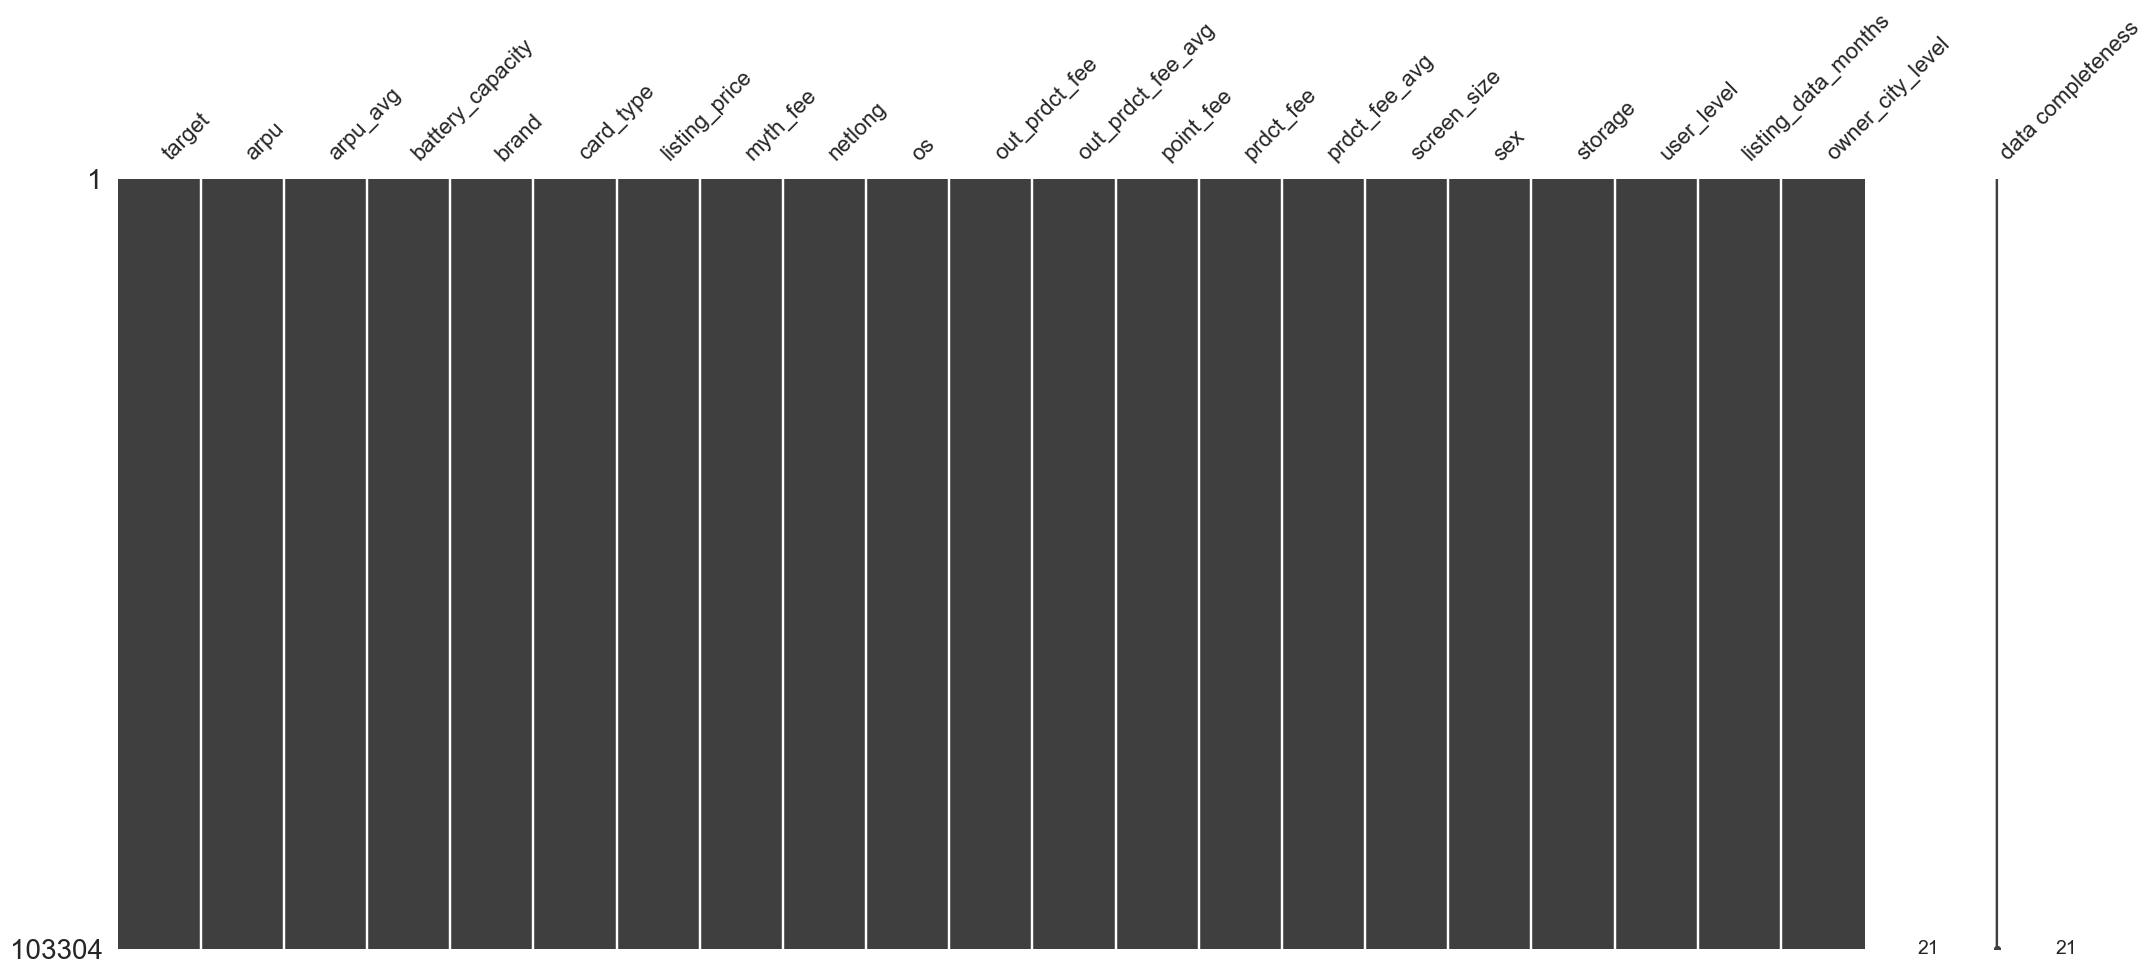

In [52]:
msno.matrix(xy_6,labels = True)

In [53]:
pandas_profiling.ProfileReport(xy_6)

Number of variables,21
Number of observations,103304
Total Missing (%),0.0%
Total size in memory,17.3 MiB
Average record size in memory,176.0 B
Numeric,14
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,4


In [54]:
xy_6.columns

Index(['target', 'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'listing_price', 'myth_fee', 'netlong', 'os', 'out_prdct_fee',
       'out_prdct_fee_avg', 'point_fee', 'prdct_fee', 'prdct_fee_avg',
       'screen_size', 'sex', 'storage', 'user_level', 'listing_data_months',
       'owner_city_level'],
      dtype='object')

In [60]:
usefulcolumn2=['target', 'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'listing_price', 'myth_fee', 'netlong', 'os', 'out_prdct_fee',
       'out_prdct_fee_avg', 'point_fee', 'prdct_fee', 'prdct_fee_avg',
       'screen_size', 'sex', 'storage', 'user_level', 'listing_data_months',
       'owner_city_level']

xy_6=xy_6[usefulcolumn2]

xy_6.drop_duplicates(keep='first',inplace=True)
xy_6.reset_index(inplace=True)

In [61]:
for columns in usefulcolumn2:
    print(columns,len(xy_6[columns].value_counts()))

target 2
arpu 13582
arpu_avg 51765
battery_capacity 267
brand 12
card_type 7
listing_price 543
myth_fee 155
netlong 61
os 11
out_prdct_fee 3
out_prdct_fee_avg 3
point_fee 3
prdct_fee 2655
prdct_fee_avg 7913
screen_size 69
sex 3
storage 16
user_level 9
listing_data_months 61
owner_city_level 11


In [62]:
#核心代码：遍历版分箱操作
def column_binning(data):
    column_list = ['arpu','arpu_avg','battery_capacity','listing_data_months','listing_price','myth_fee','netlong','prdct_fee','prdct_fee_avg']
    xy_10 = data
    for column in column_list:
        print(column)
        xy_10.insert(2,column+'_derive_1',xy_10[column])
        xy_7 = xy_10[(xy_10[column+'_derive_1'] == 9999) | (xy_10[column+'_derive_1'] == 0)]
        xy_8 = xy_10[(0<xy_10[column+'_derive_1'])&(xy_10[column+'_derive_1']<9999)]
        xy_8[column+'_derive_1'] = pd.qcut(xy_8[column+'_derive_1'],8)
        xy_9 = pd.concat([xy_8,xy_7],axis = 0)
        xy_10 = xy_9#循环一次的结果作为下一次循环的开始数据，不能直接给data复制，所以需要有xy_10这个中间变量
    return xy_9
xy_9=column_binning(xy_6)

arpu
arpu_avg
battery_capacity
listing_data_months
listing_price
myth_fee
netlong
prdct_fee
prdct_fee_avg


In [63]:
xy_9.to_excel('20190715广发_信用卡_新批核用户_分箱.xlsx',index = None)

In [64]:
xy_9.columns

Index(['index', 'target', 'prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1', 'arpu', 'arpu_avg',
       'battery_capacity', 'brand', 'card_type', 'listing_price', 'myth_fee',
       'netlong', 'os', 'out_prdct_fee', 'out_prdct_fee_avg', 'point_fee',
       'prdct_fee', 'prdct_fee_avg', 'screen_size', 'sex', 'storage',
       'user_level', 'listing_data_months', 'owner_city_level'],
      dtype='object')

In [66]:
ChuanQi_basic_df=xy_9
ChuanQi_basic_df=ChuanQi_basic_df[['target', 'prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1', 'arpu', 'arpu_avg',
       'battery_capacity', 'brand', 'card_type', 'listing_price', 'myth_fee',
       'netlong', 'os', 'out_prdct_fee', 'out_prdct_fee_avg', 'point_fee',
       'prdct_fee', 'prdct_fee_avg', 'screen_size', 'sex', 'storage',
       'user_level', 'listing_data_months', 'owner_city_level']]

ChuanQi_basic_df.reset_index(inplace=True,drop=True)
display(ChuanQi_basic_df.head(),ChuanQi_basic_df.shape)

,target,prdct_fee_avg_derive_1,prdct_fee_derive_1,netlong_derive_1,myth_fee_derive_1,listing_price_derive_1,listing_data_months_derive_1,battery_capacity_derive_1,arpu_avg_derive_1,arpu_derive_1,...,out_prdct_fee_avg,point_fee,prdct_fee,prdct_fee_avg,screen_size,sex,storage,user_level,listing_data_months,owner_city_level
0,0,"(135.865, 3922.0]","(138.0, 4926.96]","(51.0, 59.0]","(4.008, 7.92]","(3399.0, 5288.0]","(40.0, 43.0]","(0.999, 1715.0]","(153.25, 8927.083]","(168.3, 9036.93]",...,1.0,1.0,168.0,168.000000,4.7,0.0,16GB,5.0,43.0,9999.0
1,0,"(32.138, 48.967]","(28.0, 48.0]","(9.0, 15.0]","(7.92, 16.83]","(5288.0, 8999.0]","(43.0, 51.0]","(1715.0, 2000.0]","(39.4, 58.0]","(58.4, 81.018]",...,1.0,0.0,47.9,47.900002,4.0,9999.0,4GB,9999.0,46.0,3.0
2,0,"(135.865, 3922.0]","(138.0, 4926.96]","(29.0, 37.0]","(7.92, 16.83]","(2798.0, 3399.0]","(40.0, 43.0]","(2500.0, 2900.0]","(153.25, 8927.083]","(168.3, 9036.93]",...,9999.0,1.0,268.0,268.000000,5.5,1.0,16GB,6.0,43.0,1.0
3,0,"(135.865, 3922.0]","(138.0, 4926.96]","(44.0, 51.0]","(4.008, 7.92]","(5288.0, 8999.0]","(43.0, 51.0]","(1715.0, 2000.0]","(103.875, 153.25]","(110.008, 168.3]",...,1.0,1.0,158.0,158.000000,4.0,0.0,8GB,3.0,51.0,5.0
4,0,"(135.865, 3922.0]","(138.0, 4926.96]","(44.0, 51.0]","(7.92, 16.83]","(5288.0, 8999.0]","(35.0, 40.0]","(1715.0, 2000.0]","(153.25, 8927.083]","(168.3, 9036.93]",...,1.0,1.0,153.0,153.000000,4.7,1.0,32GB,5.0,40.0,2.0


(101233, 30)

In [67]:
def DealBrandOPP0(RowSeries):
    BrandName=RowSeries.brand
    if BrandName in ['OPPO','OPPO ']:
        return 'OPPO'
    else:
        return BrandName
ChuanQi_basic_df.brand=ChuanQi_basic_df.apply(DealBrandOPP0,axis=1)

brand_group=ChuanQi_basic_df.groupby('target')['brand']

In [68]:
def brand_num(ChuanQi_basic_df):
    title_mapping = {'苹果':1,'华为':2,'小米':3,'华为荣耀':4,'三星':5,'OPPO':6,'vivo':7,'魅族':8,'金立':9,'酷派':10,'空值':11,'其它品牌':12}
    ChuanQi_basic_df['brand'] = ChuanQi_basic_df['brand'].map(title_mapping)
brand_num(ChuanQi_basic_df)
ChuanQi_basic_df.columns

Index(['target', 'prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1', 'arpu', 'arpu_avg',
       'battery_capacity', 'brand', 'card_type', 'listing_price', 'myth_fee',
       'netlong', 'os', 'out_prdct_fee', 'out_prdct_fee_avg', 'point_fee',
       'prdct_fee', 'prdct_fee_avg', 'screen_size', 'sex', 'storage',
       'user_level', 'listing_data_months', 'owner_city_level'],
      dtype='object')

In [69]:
import numpy as np
#convernetlong_derive_2	listing_price_derive_2
#interval_list=['listing_data_months_derive_1','prdct_fee_avg_derive_1','arpu_avg_derive_1','prdct_fee_derive_1','listing_price_derive_1','arpu_derive_1','netlong_derive_1']
# 传奇游戏特征选择后的连续值：
#interval_list=['arpu_derive_1','listing_price','prdct_fee','arpu_avg','prdct_fee_avg','listing_data_months']

# 网贷游戏特征选择后的连续变量：
interval_list=['prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1',]
# 将区间值列的中间对应值：

intervalcolumn_df={}

def ConverIntervalData():
    for intervalcolumn in interval_list:
        ChuanQi_basic_df[intervalcolumn]=ChuanQi_basic_df[intervalcolumn].astype('str')
        intervalunique=ChuanQi_basic_df[intervalcolumn].unique()
        #print(intervalunique)
        intervalcolumn_df[intervalcolumn]={'intervaluniquelist':[]}
        intervalcolumn_df[intervalcolumn]['intervaluniquelist']=intervalunique
        intervalcolumn_df[intervalcolumn]['intervalValueDict']={}
        for intervalValue in intervalunique:
            intervalLeft=0.0
            intervalRight=0.0
            #print(intervalValue)
            if ', ' in intervalValue:
                intervalValueSplit=intervalValue.split(', ')
                intervalLeft=float(intervalValueSplit[0].split('(')[1])
                intervalRight=float(intervalValueSplit[1].split(']')[0])
                #print(intervalValueSplit,intervalLeft,intervalRight)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
            else:
                intervalLeft=float(intervalValue)
                intervalRight=float(intervalValue)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
        
        intervalcolumnAvg=[]
        for intervalValuekey in intervalcolumn_df[intervalcolumn]['intervalValueDict']:
            intervalcolumnAvg.append(intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValuekey])
        intervalcolumnAvg=np.array(intervalcolumnAvg)
        intervalcolumnAvgSortIndex=intervalcolumnAvg.argsort()
        maxpointvalue=(intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]-intervalcolumnAvg[intervalcolumnAvgSortIndex[-3]])/2+intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]
        intervalcolumn_df[intervalcolumn]['intervalValueDict']['9999']=maxpointvalue
        #print(intervalcolumnAvg,maxpointvalue)      
ConverIntervalData() 

In [70]:
# 将interval 列的数据进行替换操作：

def ReplaceIntervalColumnValue():
    for intervalcolumn in interval_list:
        ChuanQi_basic_df[intervalcolumn].replace(intervalcolumn_df[intervalcolumn]['intervalValueDict'],inplace=True)
        #print(a.head(10),ChuanQi_basic_df[intervalcolumn].head(10))
ReplaceIntervalColumnValue()

In [71]:
display(ChuanQi_basic_df.head(),ChuanQi_basic_df.columns)

,target,prdct_fee_avg_derive_1,prdct_fee_derive_1,netlong_derive_1,myth_fee_derive_1,listing_price_derive_1,listing_data_months_derive_1,battery_capacity_derive_1,arpu_avg_derive_1,arpu_derive_1,...,out_prdct_fee_avg,point_fee,prdct_fee,prdct_fee_avg,screen_size,sex,storage,user_level,listing_data_months,owner_city_level
0,0,2028.9325,2532.48,55.0,5.964,4343.5,41.5,857.9995,4540.1665,4602.615,...,1.0,1.0,168.0,168.000000,4.7,0.0,16GB,5.0,43.0,9999.0
1,0,40.5525,38.00,12.0,12.375,7143.5,47.0,1857.5000,48.7000,69.709,...,1.0,0.0,47.9,47.900002,4.0,9999.0,4GB,9999.0,46.0,3.0
2,0,2028.9325,2532.48,33.0,12.375,3098.5,41.5,2700.0000,4540.1665,4602.615,...,9999.0,1.0,268.0,268.000000,5.5,1.0,16GB,6.0,43.0,1.0
3,0,2028.9325,2532.48,47.5,5.964,7143.5,47.0,1857.5000,128.5625,139.154,...,1.0,1.0,158.0,158.000000,4.0,0.0,8GB,3.0,51.0,5.0
4,0,2028.9325,2532.48,47.5,12.375,7143.5,37.5,1857.5000,4540.1665,4602.615,...,1.0,1.0,153.0,153.000000,4.7,1.0,32GB,5.0,40.0,2.0


Index(['target', 'prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1', 'arpu', 'arpu_avg',
       'battery_capacity', 'brand', 'card_type', 'listing_price', 'myth_fee',
       'netlong', 'os', 'out_prdct_fee', 'out_prdct_fee_avg', 'point_fee',
       'prdct_fee', 'prdct_fee_avg', 'screen_size', 'sex', 'storage',
       'user_level', 'listing_data_months', 'owner_city_level'],
      dtype='object')

In [ ]:
ChuanQi_basic_df.to_excel('20190625广发_信用卡_清洗后.xlsx',index=None)

In [72]:
def ClassifyFeedBack(classifycolumnlist,origindf):
    columnvaluecount_dict={}
    for classifycolumn in classifycolumnlist:
        columngroupvaluecount=origindf.groupby('target')[classifycolumn].value_counts()
        columnvaluecount=origindf[classifycolumn].value_counts()
        if classifycolumn not in columnvaluecount_dict:            
            columnvaluecount_dict[classifycolumn]={}
            columnvaluecount_dict[classifycolumn]['target_group']=columngroupvaluecount
        columnvaluecount_dict[classifycolumn]['columnvaluecount']=columnvaluecount
    return columnvaluecount_dict  

In [73]:
usefualcolumns=['target', 'prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1', 'arpu', 'arpu_avg',
       'battery_capacity', 'brand', 'card_type', 'listing_price', 'myth_fee',
       'netlong', 'os', 'out_prdct_fee', 'out_prdct_fee_avg', 'point_fee',
       'prdct_fee', 'prdct_fee_avg', 'screen_size', 'sex', 'storage',
       'user_level', 'listing_data_months', 'owner_city_level']
ChuanQi_basic_df=ChuanQi_basic_df[usefualcolumns]

In [74]:
for columns in usefualcolumns:
    print(columns,len(ChuanQi_basic_df[columns].value_counts()))

target 2
prdct_fee_avg_derive_1 10
prdct_fee_derive_1 10
netlong_derive_1 10
myth_fee_derive_1 10
listing_price_derive_1 9
listing_data_months_derive_1 9
battery_capacity_derive_1 9
arpu_avg_derive_1 10
arpu_derive_1 10
arpu 13518
arpu_avg 51676
battery_capacity 257
brand 12
card_type 7
listing_price 533
myth_fee 154
netlong 61
os 11
out_prdct_fee 3
out_prdct_fee_avg 3
point_fee 3
prdct_fee 2641
prdct_fee_avg 7893
screen_size 69
sex 3
storage 16
user_level 9
listing_data_months 61
owner_city_level 11


In [75]:
classifycolumnlist=['prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1', 
       'brand', 'card_type',
       'os', 'out_prdct_fee', 'out_prdct_fee_avg', 'point_fee',
       'screen_size', 'sex', 'storage',
       'user_level', 'listing_data_months', 'owner_city_level']
# classifycolumnlist=ChuanQi_basic_df.columns.tolist()
# classifycolumnlist.remove('id')
# classifycolumnlist.remove('target')
columnvaluecount_dict=ClassifyFeedBack(classifycolumnlist,ChuanQi_basic_df)

In [77]:
# 写个程序检索columnvaluecount_dict 中的不同分类列是否数据一致且要保证相同的特征的不同分区都必须必修要有覆盖，防止分区为空，或者人数为零···

def checkmatchCGVC_dict(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        ColumnAllGroupsIndex=columnvaluecount_dict[column]['columnvaluecount'].index
        TureSampleGroupsIndex=columnvaluecount_dict[column]['target_group'][1].index
        for GroupsIndex in ColumnAllGroupsIndex:
            if GroupsIndex not in TureSampleGroupsIndex: 
                if GroupsIndex not in columnvaluecount_dict[column]['target_group'][1].index:
                    columnvaluecount_dict[column]['target_group'][1,GroupsIndex]=0.00001

    return columnvaluecount_dict

columnvaluecount_dict=checkmatchCGVC_dict(columnvaluecount_dict)

In [78]:
# 计算正样本的反馈率···
import numpy as np
def CalculateTurnSampleFeedBack(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['TurnSampleFeedBack']=columnvaluecount_dict[column]['target_group'][1]/columnvaluecount_dict[column]['columnvaluecount']
        columnvaluecount_dict[column]['TurnSampleLogPercentRadio']=np.log(columnvaluecount_dict[column]['TurnSampleFeedBack']/(1-columnvaluecount_dict[column]['TurnSampleFeedBack']))
    return columnvaluecount_dict

columnvaluecount_dict=CalculateTurnSampleFeedBack(columnvaluecount_dict)
display(columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'].sort_values(ascending=False),columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'][1],)

6    -1.785759
2    -1.884207
7    -1.898400
1    -1.956223
9    -2.168321
5    -2.173942
4    -2.209575
8    -2.250232
3    -2.373804
11   -2.519333
10   -2.534178
12   -2.818625
Name: brand, dtype: float64

-1.9562225737584347

In [79]:
# 对不同基础属性的类别值（分区）计算row_percent

def CalculateColumnRowPercent(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnRowPercent']=columnvaluecount_dict[column]['columnvaluecount']/columnvaluecount_dict[column]['columnvaluecount'].sum()
        
    return columnvaluecount_dict

columnvaluecount_dict=CalculateColumnRowPercent(columnvaluecount_dict)

In [80]:
# 将每个列的反馈率数值及覆盖率值输出出来···
def CreateColumnStatistics(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnStatistics']=pd.DataFrame({'RowPercent':columnvaluecount_dict[column]['TurnSampleFeedBack'],'Percent':columnvaluecount_dict[column]['ColumnRowPercent']})
        
    return columnvaluecount_dict

columnvaluecount_dict=CreateColumnStatistics(columnvaluecount_dict)
len(columnvaluecount_dict)

21

In [200]:
# 输出分类型变量的反馈率及覆盖率：
#ClassifyColumnList=['card_type','owner_city','owner_city_level','brand','user_level','sex','family_client','group_client','music','video_member','out_prdct_fee','out_prdct_fee_avg','point_fee']
#ClassifyColumnList=['netlong','card_type','owner_city','brand','user_level','sex','family_client','group_client','music','video_member','owner_city_level','out_prdct_fee','out_prdct_fee_avg','point_fee','other_tv','finance','bank']
#ClassifyColumnList=['netlong', 'out_prdct_fee', 'point_fee', 'brand', 'user_level', 'sex', 'family_client', 'group_client', 'owner_city_level']
ClassifyColumnList=['prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1', 
       'brand', 'card_type',
       'os', 'out_prdct_fee', 'out_prdct_fee_avg', 'point_fee',
       'screen_size', 'sex', 'storage',
       'user_level', 'listing_data_months', 'owner_city_level']
writer = pd.ExcelWriter('广发信用卡批核模型用户分类变量反馈率统计.xlsx')

for ClassifyColumn in ClassifyColumnList:
    columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'].to_excel(excel_writer=writer, sheet_name=ClassifyColumn, encoding="utf-8")
    #print(ClassifyColumn,columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'])
writer.save()
writer.close()

In [101]:
display(intervalcolumn_df['battery_capacity_derive_1']['intervalValueDict'])

{'(0.999, 1715.0]': 857.9995,
 '(1715.0, 2000.0]': 1857.5,
 '(2500.0, 2900.0]': 2700.0,
 '(3000.0, 3075.0]': 3037.5,
 '(3880.0, 7900.0]': 5890.0,
 '(2900.0, 3000.0]': 2950.0,
 '(2000.0, 2500.0]': 2250.0,
 '(3075.0, 3880.0]': 3477.5,
 '9999': 7096.25}

prdct_fee_avg_derive_1              prdct_fee_avg_derive_1   X_value
0.000000                  -2.155025      -inf
5.001165                  -3.744372  1.609671
14.000000                 -3.227682  2.639057
25.069000                 -2.697407  3.221632
40.552500                 -2.559425  3.702597
59.483500                 -2.232312  4.085699
83.750000                 -1.863427  4.427836
116.682500                -1.797772  4.759457
2028.932500               -1.676680  7.615265
9999.000000               -1.676680  9.210240
prdct_fee_derive_1            prdct_fee_derive_1   X_value
0.0000              -1.455562      -inf
5.0045              -3.803041  1.610338
14.0000             -3.258542  2.639057
23.0000             -2.554483  3.135494
38.0000             -2.593079  3.637586
58.0000             -2.235531  4.060443
83.0000             -1.790567  4.418841
118.0000            -1.773984  4.770685
2532.4800           -1.784408  7.836954
9999.0000           -2.318648  9.210240
netlong_deri

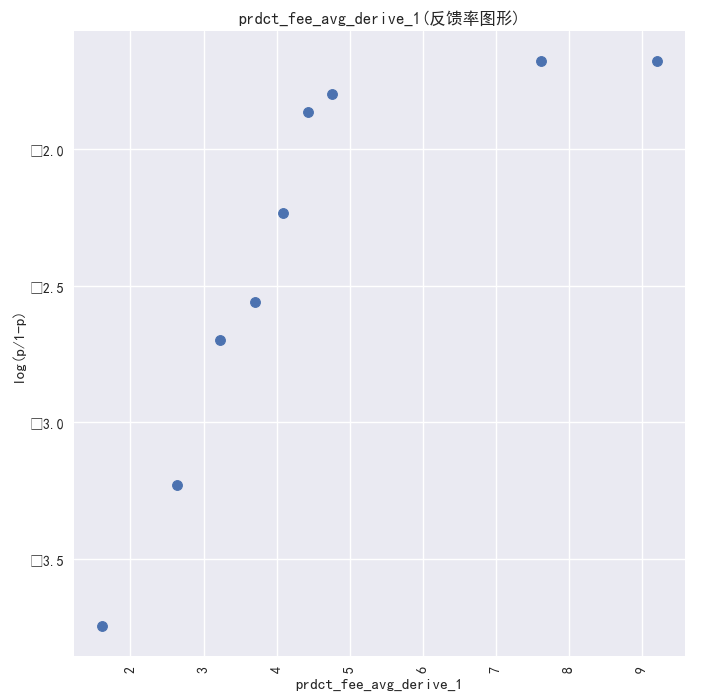

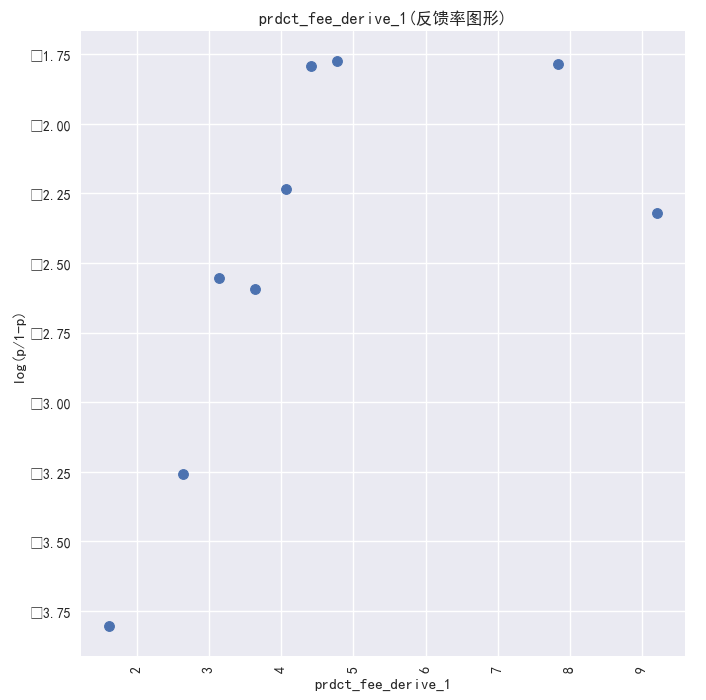

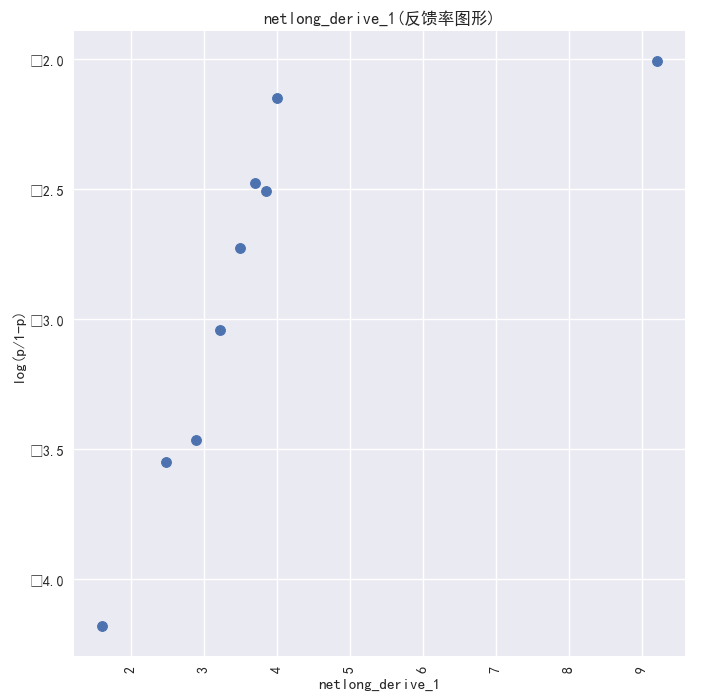

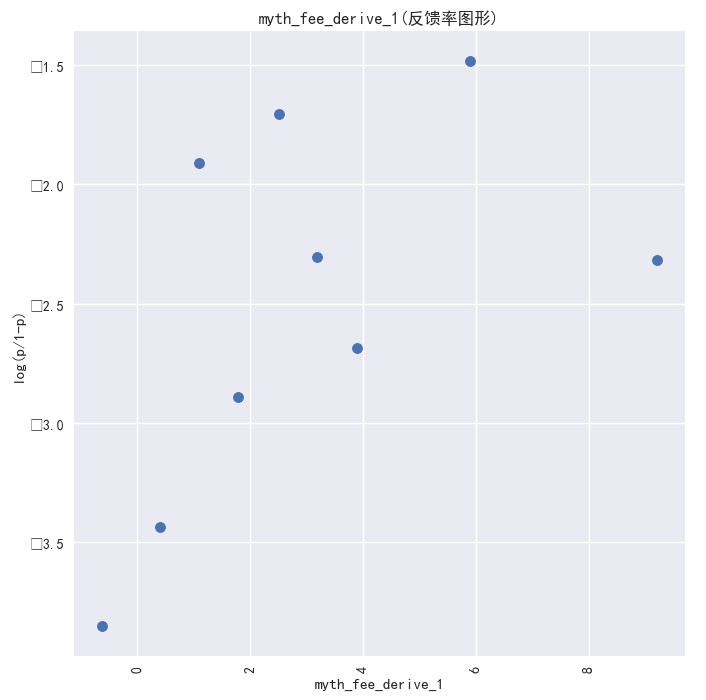

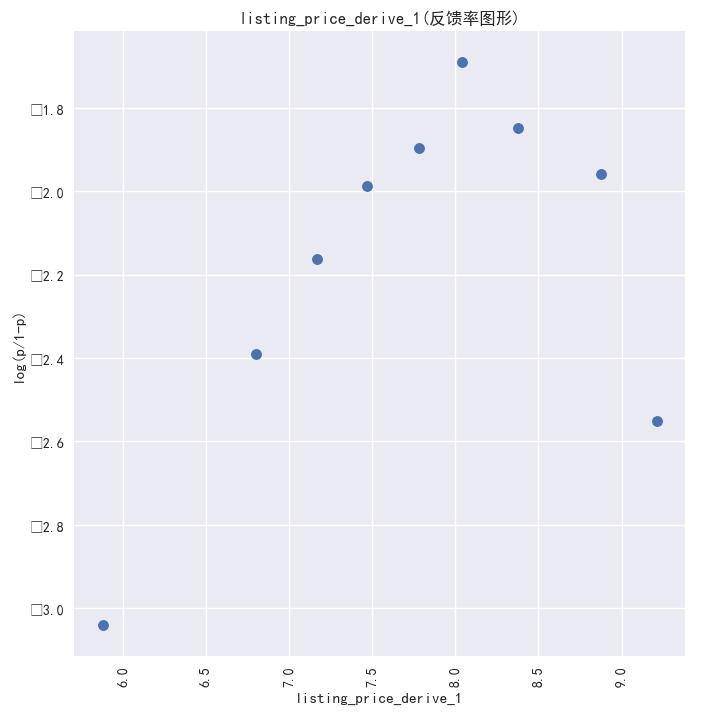

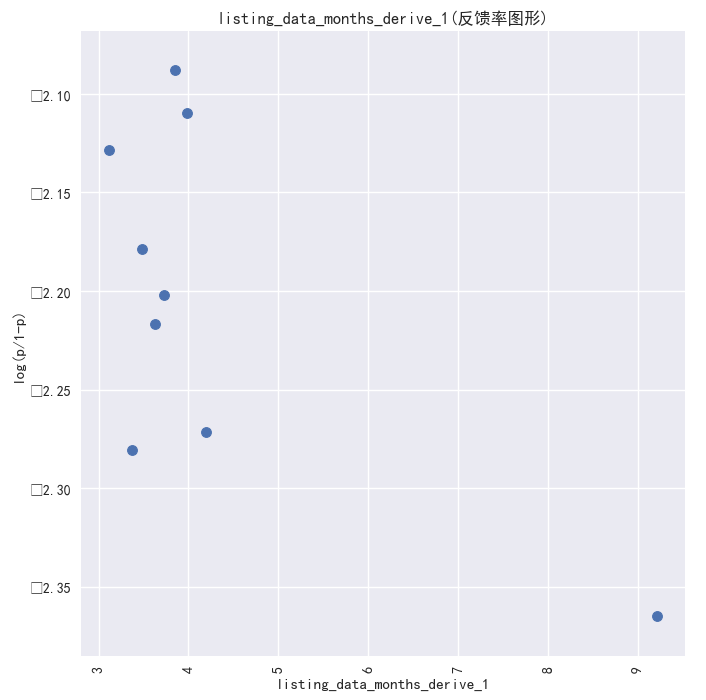

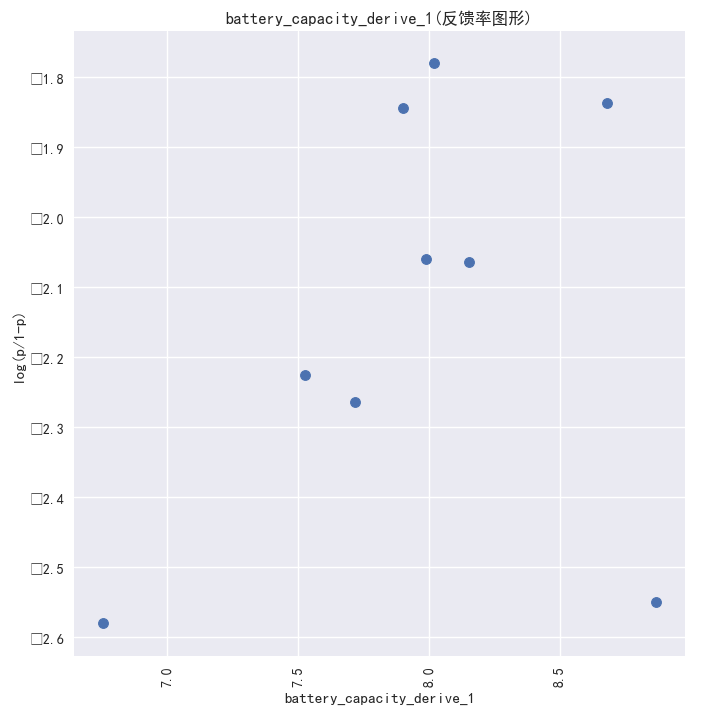

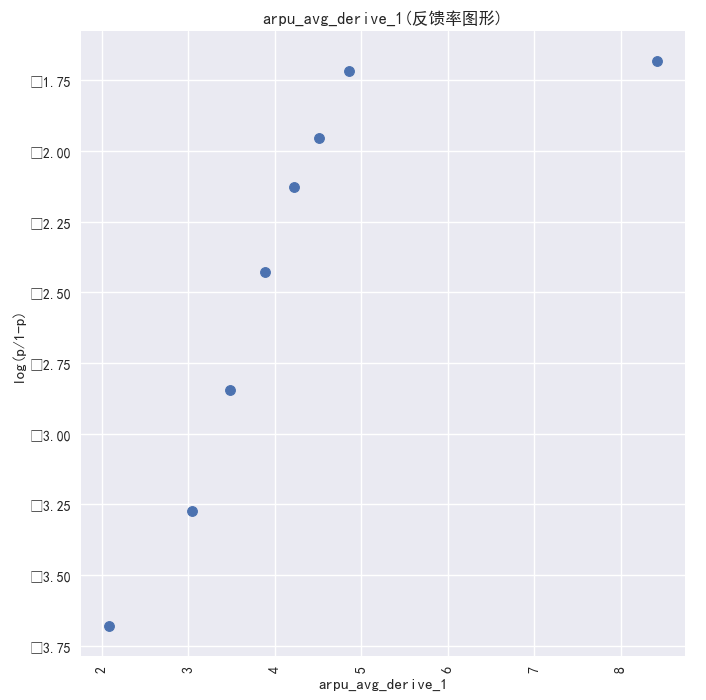

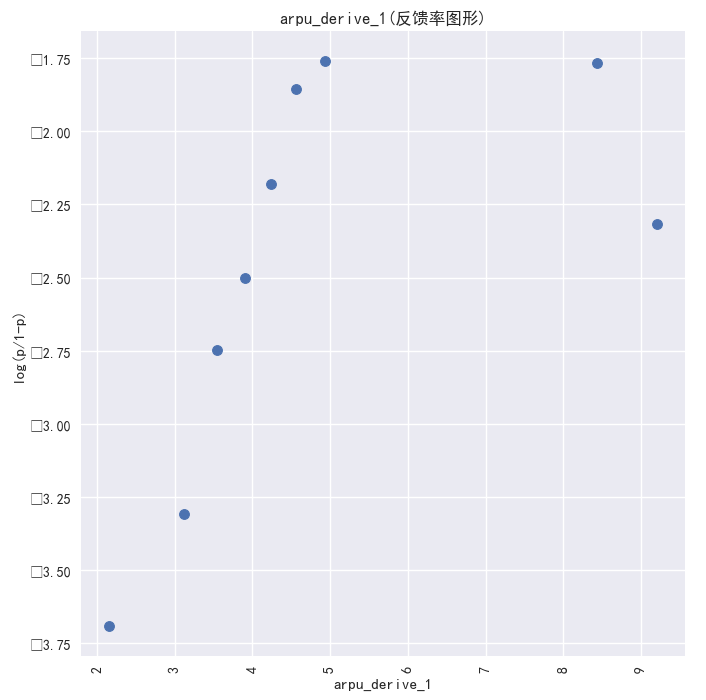

In [82]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=10)
sns.set(font=myfont.get_name())

# 对连续型变量的反馈率数据进行绘图操作：
ContinuousColumnList=['prdct_fee_avg_derive_1', 'prdct_fee_derive_1',
       'netlong_derive_1', 'myth_fee_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'arpu_avg_derive_1', 'arpu_derive_1', ]
for ContinuousColumn in ContinuousColumnList:
    #print(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    ContinuousSampleLogPercentRadio=pd.DataFrame(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    #print(ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1])
    ContinuousSampleLogPercentRadio.replace(float('inf'),ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1],inplace=True)
    ContinuousSampleLogPercentRadio['X_value']=np.log(ContinuousSampleLogPercentRadio.index) #进行对数变换
    #ContinuousSampleLogPercentRadio['X_value']=ContinuousSampleLogPercentRadio.index
    #print(ContinuousSampleLogPercentRadio,ContinuousSampleLogPercentRadio.columns)
    g = sns.FacetGrid(ContinuousSampleLogPercentRadio,palette="Set1", size=7)
    g.map(plt.scatter,'X_value',ContinuousColumn,linewidth=.8)
    print(ContinuousColumn,ContinuousSampleLogPercentRadio)
    g.set_xticklabels(rotation=90)
    g.set_axis_labels(ContinuousColumn, "log(p/1-p)");
    #plt.xlim(1,8)
    plt.title(ContinuousColumn+u'(反馈率图形)')
    g.add_legend()
    g.savefig('广发信用卡批核模型连续型变量反馈率图像\\'+ContinuousColumn+u'(反馈率图形).png',dpi=100)

In [ ]:
xy_1 = pd.read_excel('20190715广发_信用卡_清洗后.xlsx')

In [83]:
xy_1.columns

Index(['index', 'id', 'target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'myth_fee', 'brand',
       'listing_date', 'listing_price', 'nettime', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'expirationtime',
       'video_member', 'other_tv', 'finance', 'bank', 'campus_client',
       'migu_tv', 'age', 'adis', 'arpu_avg', 'myth_fee_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'os', 'battery_capacity',
       'storage', 'screen_size'],
      dtype='object')

In [85]:
plt.style.use('bmh')
plt.rc('font',family = 'SimHei',size = 13)
cat_list = ['target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'myth_fee', 'brand',
       'listing_date', 'listing_price', 'nettime', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'expirationtime',
       'video_member', 'other_tv', 'finance', 'bank', 'campus_client',
       'migu_tv', 'age', 'adis', 'arpu_avg', 'myth_fee_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'os', 'battery_capacity',
       'storage', 'screen_size']
for n,i in enumerate(cat_list):
    xy_1_cat_num = xy_1[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,xy_1_cat_num))

1.target特征的类型数量是：2
2.card_type特征的类型数量是：6
3.netlong特征的类型数量是：60
4.owner_city特征的类型数量是：279
5.arpu特征的类型数量是：13581
6.out_prdct_fee特征的类型数量是：4067
7.prdct_fee特征的类型数量是：2654
8.point_fee特征的类型数量是：9158
9.myth_fee特征的类型数量是：154
10.brand特征的类型数量是：606
11.listing_date特征的类型数量是：973
12.listing_price特征的类型数量是：543
13.nettime特征的类型数量是：37706
14.user_level特征的类型数量是：8
15.sex特征的类型数量是：2
16.family_client特征的类型数量是：1
17.group_client特征的类型数量是：1
18.music特征的类型数量是：1
19.expirationtime特征的类型数量是：4094
20.video_member特征的类型数量是：1
21.other_tv特征的类型数量是：1
22.finance特征的类型数量是：1
23.bank特征的类型数量是：1
24.campus_client特征的类型数量是：1
25.migu_tv特征的类型数量是：1
26.age特征的类型数量是：51
27.adis特征的类型数量是：1
28.arpu_avg特征的类型数量是：51764
29.myth_fee_avg特征的类型数量是：378
30.out_prdct_fee_avg特征的类型数量是：16952
31.prdct_fee_avg特征的类型数量是：7912
32.os特征的类型数量是：10
33.battery_capacity特征的类型数量是：407
34.storage特征的类型数量是：128
35.screen_size特征的类型数量是：68


In [86]:
# 删除 listing_data_months_derive_1，card_type，owner_city，listing_data_months

xy_1=ChuanQi_basic_df[['target', 'brand', 'os',
       'out_prdct_fee_avg', 'point_fee', 'sex', 'storage', 'user_level',
       'owner_city_level', 'prdct_fee_avg', 'prdct_fee',    
       'netlong', 'myth_fee',
       'listing_price', 'battery_capacity', 'arpu_avg', 'arpu',]]

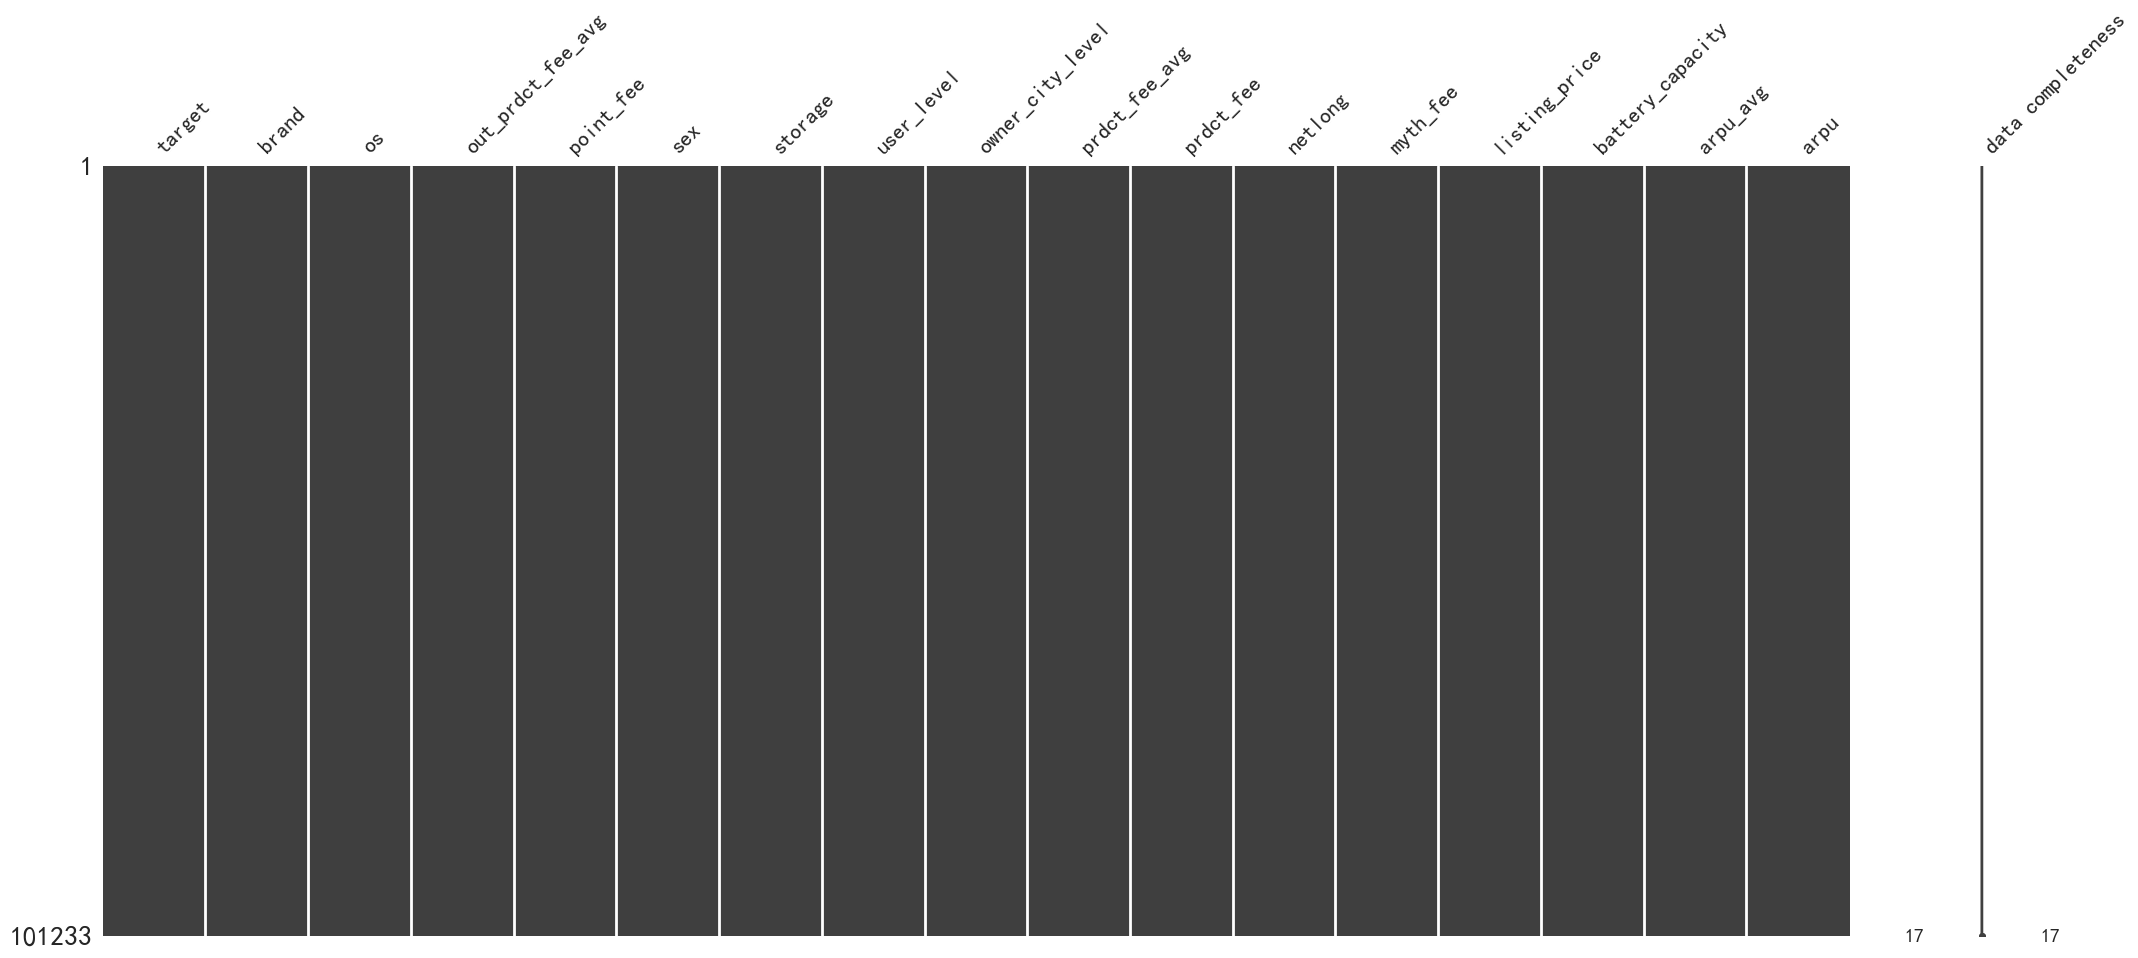

In [87]:
msno.matrix(xy_1,labels = True)

In [88]:
pandas_profiling.ProfileReport(xy_1)

Number of variables,17
Number of observations,101233
Total Missing (%),0.0%
Total size in memory,13.1 MiB
Average record size in memory,136.0 B
Numeric,10
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,5


In [144]:
for columns in ['target', 'brand', 'os',
       'out_prdct_fee_avg', 'point_fee', 'sex', 'storage', 'user_level',
       'owner_city_level', 'prdct_fee_avg', 'prdct_fee',    
       'netlong', 'myth_fee',
       'listing_price', 'battery_capacity', 'arpu_avg', 'arpu',]:
    print(columns,len(xy_1[columns].value_counts()))

target 2
brand 12
os 11
out_prdct_fee_avg 3
point_fee 3
sex 3
storage 16
user_level 9
owner_city_level 11
prdct_fee_avg 7893
prdct_fee 2641
netlong 61
myth_fee 154
listing_price 533
battery_capacity 257
arpu_avg 51676
arpu 13518


In [254]:
#去除掉以上列
xy_6 = xy_1[['target', 'brand', 'os',
       'out_prdct_fee_avg', 'point_fee', 'sex', 'storage', 'user_level',
       'owner_city_level', 'prdct_fee_avg', 'prdct_fee',    
       'netlong', 'myth_fee',
       'listing_price', 'battery_capacity', 'arpu_avg', 'arpu',]]

# 连续型特征变量：['netlong','arpu','prdct_fee','listing_price','arpu_avg','prdct_fee_avg','screen_size']
# 去除重复行：
xy_6.drop_duplicates(keep='first',inplace=True)
xy_6.reset_index(inplace=True)

In [255]:


xy_6['netlong'][(xy_6['netlong']==9999)]=58

xy_6['arpu'][(xy_6['arpu']>400)&(xy_6['arpu']<9999)]=400
xy_6['arpu'][(xy_6['arpu']==9999)]=60

xy_6['prdct_fee'][(xy_6['prdct_fee']>200)&(xy_6['prdct_fee']<9999)]=200
xy_6['prdct_fee'][(xy_6['prdct_fee']==9999)]=50

xy_6['listing_price'][(xy_6['listing_price']==9999)]=500 
xy_6['listing_price'][(xy_6['listing_price']>5288.0)&(xy_6['listing_price']<8999.0)]=2000
xy_6['listing_price'][(xy_6['listing_price']>3399.0)&(xy_6['listing_price']<5288.0)]=2500

xy_6['arpu_avg'][(xy_6['arpu_avg']>500)&(xy_6['arpu_avg']<9999)]=500
xy_6['arpu_avg'][(xy_6['arpu_avg']==9999)]=500

xy_6['prdct_fee_avg'][(xy_6['prdct_fee_avg']>500)&(xy_6['prdct_fee_avg']<9999)]=500
xy_6['prdct_fee_avg'][(xy_6['prdct_fee_avg']==9999)]=400

xy_6['myth_fee'][(xy_6['myth_fee']==9999)]=20

# 电池容量：battery_capacity_derive_1
# batterymap={3025:1,5845:1,2875:1,2550:2,3260:2,1850:2,2175:3,7137.5:3,850.4995:3}
# xy_6['battery_capacity_derive_1'].replace(batterymap,inplace=True)
xy_6['battery_capacity'][(xy_6['battery_capacity']==9999)]=900

# 手机品牌：
brandmap={1:1,2:1,4:2,5:2,6:2,7:2,3:3,8:3,9:3,10:3,11:4,12:4}
xy_6['brand'].replace(brandmap,inplace=True)
# xy_6['brand'][(xy_6['brand']==8)|(xy_6['brand']==10)|(xy_6['brand']==6)] = 1000
# xy_6['brand'][(xy_6['brand']==11)|(xy_6['brand']==7)|(xy_6['brand']==12)|(xy_6['brand']==4)] = 2000
# xy_6['brand'][(xy_6['brand']==9)|(xy_6['brand']==3)|(xy_6['brand']==1)|(xy_6['brand']==2)|(xy_6['brand']==5)] = 3000

# user_level
userlevelmap={4:1,5:1,6:1,7:1,3:2,9999:2,0:3,1:3,2:3}
xy_6['user_level'].replace(userlevelmap,inplace=True)
# xy_6['user_level'][(xy_6['user_level']>=5) & (xy_6['user_level']<=7)] =100
# xy_6['user_level'][(xy_6['user_level']<=4) | (xy_6['user_level']==9999)] = 200

# 内存表：

storagemap={'64GB':1,'128GB':1,'32GB':1,'16GB':1,'4GB':1,'8GB':1,'nan':2,'512MB':3,'256MB':3,'128MB':3,'4MB':3,'其它存储':3,'32MB':3,'64MB':3,'16MB':3,'8MB':3}
xy_6['storage'].replace(storagemap,inplace=True)

# owner_city_level
citylevelmap={8:1,10:1,9999:1,9:2,7:2,4:3,5:3,6:3,3:4,2:4,1:4}
xy_6['owner_city_level'].replace(citylevelmap,inplace=True)
# xy_6['owner_city_level'][xy_6['owner_city_level']>=7] =3
# xy_6['owner_city_level'][(xy_6['owner_city_level']>=4) & (xy_6['owner_city_level']<7)] = 2
# xy_6['owner_city_level'][xy_6['owner_city_level']<=3] = 1

# 操作系统：

osmap={7:1,3:1,4:2,9999:3,1:4,12:4,99:4,2:4,6:4,8:4,5:4,}
xy_6['os'].replace(osmap,inplace=True)

In [256]:
xy_6.columns

Index(['index', 'target', 'brand', 'os', 'out_prdct_fee_avg', 'point_fee',
       'sex', 'storage', 'user_level', 'owner_city_level', 'prdct_fee_avg',
       'prdct_fee', 'netlong', 'myth_fee', 'listing_price', 'battery_capacity',
       'arpu_avg', 'arpu'],
      dtype='object')

In [257]:
for columns in [  'target', 'brand', 'os', 'out_prdct_fee_avg', 'point_fee',
       'sex', 'storage', 'user_level', 'owner_city_level', 'prdct_fee_avg',
       'prdct_fee', 'netlong', 'myth_fee', 'listing_price', 'battery_capacity',
       'arpu_avg', 'arpu']:
    print(columns,len(xy_6[columns].value_counts()))

target 2
brand 4
os 4
out_prdct_fee_avg 3
point_fee 3
sex 3
storage 3
user_level 3
owner_city_level 4
prdct_fee_avg 7871
prdct_fee 2266
netlong 60
myth_fee 154
listing_price 454
battery_capacity 256
arpu_avg 51450
arpu 13077


In [258]:
xy_6.drop_duplicates(keep='first',inplace=True)
xy_6.reset_index(inplace=True)

In [259]:
# 对模型的离散型变量进行虚拟变量处理：onehot编码需要str格式
ClassifyColumnsList=['brand', 'os', 'out_prdct_fee_avg', 'point_fee',
       'sex', 'storage', 'user_level', 'owner_city_level',]

for ClassifyColumn in ClassifyColumnsList:
    #print(ClassifyColumn,len(ChuanQi_basic_df[ClassifyColumn].value_counts()))
    xy_6[ClassifyColumn]=xy_6[ClassifyColumn].astype('str')
xy_7 = xy_6[[ 'target', 'brand', 'os', 'out_prdct_fee_avg', 'point_fee',
       'sex', 'storage', 'user_level', 'owner_city_level', 'prdct_fee_avg',
       'prdct_fee', 'netlong', 'myth_fee', 'listing_price', 'battery_capacity',
       'arpu_avg']]
##筛选特定列
display(xy_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97719 entries, 0 to 97718
Data columns (total 16 columns):
target               97719 non-null int64
brand                97719 non-null object
os                   97719 non-null object
out_prdct_fee_avg    97719 non-null object
point_fee            97719 non-null object
sex                  97719 non-null object
storage              97719 non-null object
user_level           97719 non-null object
owner_city_level     97719 non-null object
prdct_fee_avg        97719 non-null float64
prdct_fee            97719 non-null float64
netlong              97719 non-null float64
myth_fee             97719 non-null float64
listing_price        97719 non-null float64
battery_capacity     97719 non-null int64
arpu_avg             97719 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 11.9+ MB


None

In [260]:
xy_7.brand.value_counts()

4    51210
2    23826
1    14762
3     7921
Name: brand, dtype: int64

In [261]:
xy_7_onehot=pd.get_dummies(xy_7)
xy_7_onehot.columns

Index(['target', 'prdct_fee_avg', 'prdct_fee', 'netlong', 'myth_fee',
       'listing_price', 'battery_capacity', 'arpu_avg', 'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'os_1.0', 'os_2.0', 'os_3.0', 'os_4.0',
       'out_prdct_fee_avg_0.0', 'out_prdct_fee_avg_1.0',
       'out_prdct_fee_avg_9999.0', 'point_fee_0.0', 'point_fee_1.0',
       'point_fee_9999.0', 'sex_0.0', 'sex_1.0', 'sex_9999.0', 'storage_1',
       'storage_2', 'storage_3', 'user_level_1.0', 'user_level_2.0',
       'user_level_3.0', 'owner_city_level_1.0', 'owner_city_level_2.0',
       'owner_city_level_3.0', 'owner_city_level_4.0'],
      dtype='object')

In [262]:
np.isnan(xy_7_onehot).any()#False表示无缺失值
xy_7_onehot[xy_7_onehot.isnull().values==True]

,target,prdct_fee_avg,prdct_fee,netlong,myth_fee,listing_price,battery_capacity,arpu_avg,brand_1,brand_2,...,storage_1,storage_2,storage_3,user_level_1.0,user_level_2.0,user_level_3.0,owner_city_level_1.0,owner_city_level_2.0,owner_city_level_3.0,owner_city_level_4.0


In [263]:
from sklearn import linear_model as lr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
import sklearn.metrics as sm
class_weight = dict({1:9,0:1})#配置权重，1万正样本权重为9,9万随机样本的权重为1
df_x = xy_7_onehot[[  'prdct_fee_avg', 'prdct_fee', 'netlong', 'myth_fee',
       'listing_price', 'battery_capacity', 'arpu_avg', 'brand_1',
       'brand_2', 'brand_3', 'brand_4', 'os_1.0', 'os_2.0', 'os_3.0', 'os_4.0',
       'out_prdct_fee_avg_0.0', 'out_prdct_fee_avg_1.0',
       'out_prdct_fee_avg_9999.0', 'point_fee_0.0', 'point_fee_1.0',
       'point_fee_9999.0', 'sex_0.0', 'sex_1.0', 'sex_9999.0', 'storage_1',
       'storage_2', 'storage_3', 'user_level_1.0', 'user_level_2.0',
       'user_level_3.0', 'owner_city_level_1.0', 'owner_city_level_2.0',
       'owner_city_level_3.0']]
df_y = xy_7_onehot['target']
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)

#逻辑回归
model = linear_model.LogisticRegression(class_weight = class_weight)
# model = linear_model.Lasso()
model.fit(X_train, Y_train)
y_train_score = model.decision_function(X_train)#用于计算训练集的KS值
y_score = model.decision_function(X_test)#计算预测结果概率值，用于计算测试集的KS值
y_test = model.predict(X_test)
print('模型预测成功率为：',(y_test == Y_test).sum() / len(y_test))
y_test1 = pd.Series(y_test)#**numpy没有value_counts,故要转化为pd.Series.此处是预测值
Y_test1 = pd.Series(Y_test)
print('真实测试数据：\n',Y_test1.value_counts())
print('预测的测试数据：\n', y_test1.value_counts())

模型预测成功率为： 0.6975644699140401
真实测试数据：
 0    44199
1     4661
Name: target, dtype: int64
预测的测试数据：
 0    32372
1    16488
dtype: int64


In [264]:
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

#对数据的训练集进行标准化
ss = StandardScaler()
X_StandardScaler = ss.fit(X_train)
X_train=X_StandardScaler.transform(X_train)
X_test= X_StandardScaler.transform(X_test)
# X_train = ss.fit_transform(X_train)     #先拟合数据在进行标准化
# X_test = ss.fit_transform(X_test)
display(len(X_train),len(X_test))


lr = LogisticRegressionCV(multi_class="ovr",fit_intercept=True,Cs=np.logspace(-2,2,20),cv=2,penalty="l2",solver="lbfgs",tol=0.01)

re = lr.fit(X_train,Y_train)
r_train = re.score(X_train,Y_train)


print("R值(准确率):",r_train)
print("参数:",re.coef_)
print("截距:",re.intercept_)
print("稀疏化特征比率:%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("=========sigmoid函数转化的值，即：概率p=========")
print(re.predict_proba(X_test)[:5])     #sigmoid函数转化的值，即：概率p


Y_test_predict = lr.predict(X_test)      #预测

# 计算测试集的准确率···
r_test = re.score(X_test,Y_test)
print("R值(准确率):",r_test)
display(Y_test_predict.sum())

48859

48860

R值(准确率): 0.9058310649010418
参数: [[ 0.23819796 -0.18213703  0.46399868 -0.02066264  0.10824935  0.10593768
   0.24461695  0.04340807  0.04854601 -0.04342597 -0.04928548 -0.12934751
  -0.03257908  0.2154114  -0.21448555 -0.20151677 -0.0148895   0.12231054
  -0.05217828  0.11209409 -0.0739582   0.04934753 -0.05488394  0.0089074
   0.05646465 -0.04347675 -0.04074652  0.08013881 -0.01172755 -0.03906371
   0.43185044  0.38215111  0.46030798]]
截距: [-2.63637228]
稀疏化特征比率:0.00%
=========sigmoid函数转化的值，即：概率p=========
[[0.96533456 0.03466544]
 [0.92271497 0.07728503]
 [0.98184245 0.01815755]
 [0.94058745 0.05941255]
 [0.89316087 0.10683913]]
R值(准确率): 0.9042365943512075


174

In [265]:
# 绘制模型的Roc/Auc值的曲线图

from sklearn import metrics

lr_y_test_score = lr.decision_function(X_test)
lr_fpr_test,lr_tpr_test,lr_threasholds_test = metrics.roc_curve(Y_test.ravel(),lr_y_test_score.ravel())
lr_auc_test = metrics.auc(lr_fpr_test,lr_tpr_test)

lr_y_train_score = lr.decision_function(X_train)
lr_fpr_train,lr_tpr_train,lr_threasholds_train = metrics.roc_curve(Y_train.ravel(),lr_y_train_score.ravel())  #Y_predict
lr_auc_train = metrics.auc(lr_fpr_train,lr_tpr_train)


print("Logistic算法R值(训练):",lr.score(X_train,Y_train))
print("Logistic算法AUC值(训练):",lr_auc_train)

print("Logistic算法R值(测试):",lr.score(X_test,Y_test))
print("Logistic算法AUC值(测试):",lr_auc_test)

Logistic算法R值(训练): 0.9058310649010418
Logistic算法AUC值(训练): 0.7507238129483849
Logistic算法R值(测试): 0.9042365943512075
Logistic算法AUC值(测试): 0.7504238294147203


In [266]:
# 在训练集上统计十等分检验表：
Y_train_proba=lr.predict_proba(X_train)
Y_train_predict=lr.predict(X_train)
Y_train_predict_true=Y_train_proba[:,1]

Y_test_proba=lr.predict_proba(X_test)
Y_test_predict=lr.predict(X_test)
Y_test_predict_true=Y_test_proba[:,1]
Y_train_predict.sum()

169

In [267]:
# 训练集的十等分表：
IndexSeriers=pd.Series(np.arange(0,10,1))


Result_KS_10_Dic={'Train_KS_10':{},'Test_KS_10':{}}
Result_KS_10_Dic['Train_KS_10']['y_train']=Y_train
Result_KS_10_Dic['Train_KS_10']['y_train_predict']=Y_train_predict
Result_KS_10_Dic['Train_KS_10']['y_train_true_proba']=Y_train_predict_true
Train_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Train_KS_10'])

Result_KS_10_Dic['Test_KS_10']['y_test']=Y_test
Result_KS_10_Dic['Test_KS_10']['y_test_predict']=Y_test_predict
Result_KS_10_Dic['Test_KS_10']['y_test_true_proba']=Y_test_predict_true
Test_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Test_KS_10'])
display(Train_KS_10_df.head(),len(Train_KS_10_df),Test_KS_10_df.head(),len(Test_KS_10_df))
# 对概率值进行降序排列：
Train_KS_10_df.sort_values('y_train_true_proba',ascending=False,inplace=True)
Train_KS_10_df.reset_index(inplace=True)
Train_KS_10_df['true_proba_cluster']=pd.qcut(Train_KS_10_df.y_train_true_proba,10)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.DataFrame(Train_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['KS_10_cluster_crowd_number'])

# 对测试值进行降序排列：
Test_KS_10_df.sort_values('y_test_true_proba',ascending=False,inplace=True)
Test_KS_10_df.reset_index(inplace=True)
Test_KS_10_df['true_proba_cluster']=pd.qcut(Test_KS_10_df.y_test_true_proba,10)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.DataFrame(Test_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])


,y_train,y_train_predict,y_train_true_proba
5419,0,0,0.046262
13558,0,0,0.019483
47648,0,0,0.076023
78358,1,0,0.087851
17692,1,0,0.151349


48859

,y_test,y_test_predict,y_test_true_proba
60760,0,0,0.034665
24384,0,0,0.077285
18789,0,0,0.018158
16056,0,0,0.059413
61771,0,0,0.106839


48860

,index,true_proba_cluster,0
0,"(0.201, 0.857]",4886,0
1,"(0.147, 0.201]",4886,1
2,"(0.111, 0.147]",4886,2
3,"(0.0867, 0.111]",4886,3
4,"(0.0684, 0.0867]",4885,4
5,"(0.0544, 0.0684]",4886,5
6,"(0.0425, 0.0544]",4886,6
7,"(0.0312, 0.0425]",4886,7
8,"(0.0177, 0.0312]",4886,8
9,"(-0.00015700000000000002, 0.0177]",4886,9


,index,true_proba_cluster,0
0,"(0.201, 0.864]",4886,0
1,"(0.147, 0.201]",4886,1
2,"(0.112, 0.147]",4886,2
3,"(0.0866, 0.112]",4886,3
4,"(0.0686, 0.0866]",4886,4
5,"(0.0545, 0.0686]",4886,5
6,"(0.0427, 0.0545]",4886,6
7,"(0.0313, 0.0427]",4886,7
8,"(0.0178, 0.0313]",4886,8
9,"(-5.600000000000006e-05, 0.0178]",4886,9


In [268]:
# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['KS_10_cluster_map'][Result_KS_10_Dic['KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['KS_10_cluster_map'])

# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['Test_KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['Test_KS_10_cluster_map'][Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['Test_KS_10_cluster_map'])

{Interval(0.201, 0.857, closed='right'): 0,
 Interval(0.147, 0.201, closed='right'): 1,
 Interval(0.111, 0.147, closed='right'): 2,
 Interval(0.0867, 0.111, closed='right'): 3,
 Interval(0.0684, 0.0867, closed='right'): 4,
 Interval(0.0544, 0.0684, closed='right'): 5,
 Interval(0.0425, 0.0544, closed='right'): 6,
 Interval(0.0312, 0.0425, closed='right'): 7,
 Interval(0.0177, 0.0312, closed='right'): 8,
 Interval(-0.00015700000000000002, 0.0177, closed='right'): 9}

{Interval(0.201, 0.864, closed='right'): 0,
 Interval(0.147, 0.201, closed='right'): 1,
 Interval(0.112, 0.147, closed='right'): 2,
 Interval(0.0866, 0.112, closed='right'): 3,
 Interval(0.0686, 0.0866, closed='right'): 4,
 Interval(0.0545, 0.0686, closed='right'): 5,
 Interval(0.0427, 0.0545, closed='right'): 6,
 Interval(0.0313, 0.0427, closed='right'): 7,
 Interval(0.0178, 0.0313, closed='right'): 8,
 Interval(-5.600000000000006e-05, 0.0178, closed='right'): 9}

In [269]:
Train_KS_10_df['true_proba_cluster_map']=Train_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['KS_10_cluster_map'])

Test_KS_10_df['true_proba_cluster_map']=Test_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['Test_KS_10_cluster_map'])

Train_KS_10_df_groupby_true_proba_cluster_map=Train_KS_10_df.groupby('true_proba_cluster_map')

Test_KS_10_df_groupby_true_proba_cluster_map=Test_KS_10_df.groupby('true_proba_cluster_map')

Result_KS_10_Dic['KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Train_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['KS_10_TPV_Number'][proba_cluster_map]=(Train_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_train']==1).sum()
    
Result_KS_10_Dic['Test_KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Test_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['Test_KS_10_TPV_Number'][proba_cluster_map]=(Test_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_test']==1).sum()


Result_KS_10_Dic['Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['KS_10_TPV_Number'])
Result_KS_10_Dic['Real_True_Sample_number_rate3']=Result_KS_10_Dic['Real_True_Sample_number']/Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['KS_10_TPV_Number'].values())).sum())

#Result_KS_10_Dic['Test_KS_10_TPV_Number']
Result_KS_10_Dic['Test_Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['Test_KS_10_TPV_Number'])
Result_KS_10_Dic['Test_Real_True_Sample_number_rate3']=Result_KS_10_Dic['Test_Real_True_Sample_number']/Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Test_Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['Test_KS_10_TPV_Number'].values())).sum())


Result_KS_10_Statistics_df=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Real_True_Sample_number'],Result_KS_10_Dic['Real_True_Sample_number_rate3'],Result_KS_10_Dic['Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_df.columns=['CustomNumber','True_Sample_CustomNumber','Real_True_Sample_number_rate3','Real_True_Sample_number_rate4']
Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_df['ModelAcquireVaue']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']


Result_KS_10_Statistics_Test_df=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Test_Real_True_Sample_number'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate3'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_Test_df.columns=['Test_CustomNumber','Test_True_Sample_CustomNumber','Test_Real_True_Sample_number_rate3','Test_Real_True_Sample_number_rate4']
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']




In [270]:
Result_KS_10_Dic['KS_Point']={'x_point':Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['KS_Point'])

Result_KS_10_Dic['Test_KS_Point']={'x_point':Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['Test_KS_Point'])

{'x_point': 2, 'y_point': 0.6297262059973925}

{'x_point': 2, 'y_point': 0.634627762282772}

In [271]:
#每个箱子中箱子正样本比例Real_True_Sample_number_rate3=True_Sample_CustomNumber/ CustomNumber
#箱子正样本占总正样本比例Real_True_Sample_number_rate4=True_Sample_CustomNumber/ΣTrue_Sample_CustomNumber
#累计和Real_True_Sample_number_rate4_accumulate=ΣReal_True_Sample_number_rate4
display(Result_KS_10_Statistics_df,Result_KS_10_Statistics_Test_df)

,CustomNumber,True_Sample_CustomNumber,Real_True_Sample_number_rate3,Real_True_Sample_number_rate4,Real_True_Sample_number_rate4_accumulate,Real_True_Sample_number_rate_random,ModelAcquireVaue
0,4886,1494,0.305772,0.324641,0.324641,0.000000,0.324641
1,4886,845,0.172943,0.183616,0.508257,0.111111,0.397146
2,4886,559,0.114409,0.121469,0.629726,0.222222,0.407504
3,4886,452,0.092509,0.098218,0.727944,0.333333,0.394611
4,4885,345,0.070624,0.074967,0.802912,0.444444,0.358467
5,4886,311,0.063651,0.067579,0.870491,0.555556,0.314936
6,4886,242,0.049529,0.052586,0.923077,0.666667,0.256410
7,4886,172,0.035203,0.037375,0.960452,0.777778,0.182674
8,4886,126,0.025788,0.027379,0.987831,0.888889,0.098942
9,4886,56,0.011461,0.012169,1.000000,1.000000,0.000000


,Test_CustomNumber,Test_True_Sample_CustomNumber,Test_Real_True_Sample_number_rate3,Test_Real_True_Sample_number_rate4,Test_Real_True_Sample_number_rate4_accumulate,Test_Real_True_Sample_number_rate_random,Test_ModelAcquireVaue
0,4886,1438,0.294310,0.308517,0.308517,0.000000,0.308517
1,4886,878,0.179697,0.188372,0.496889,0.111111,0.385778
2,4886,642,0.131396,0.137739,0.634628,0.222222,0.412406
3,4886,455,0.093123,0.097619,0.732246,0.333333,0.398913
4,4886,347,0.071019,0.074448,0.806694,0.444444,0.362249
5,4886,311,0.063651,0.066724,0.873418,0.555556,0.317862
6,4886,237,0.048506,0.050847,0.924265,0.666667,0.257599
7,4886,173,0.035407,0.037116,0.961382,0.777778,0.183604
8,4886,120,0.024560,0.025746,0.987127,0.888889,0.098238
9,4886,60,0.012280,0.012873,1.000000,1.000000,0.000000


netlong
Optimization terminated successfully.
         Current function value: 0.303403
         Iterations 7
storage_1
Optimization terminated successfully.
         Current function value: 0.309201
         Iterations 7
storage_2
Optimization terminated successfully.
         Current function value: 0.309995
         Iterations 6
brand_4
Optimization terminated successfully.
         Current function value: 0.309037
         Iterations 6
point_fee_0.0
Optimization terminated successfully.
         Current function value: 0.310547
         Iterations 7
owner_city_level_3.0
Optimization terminated successfully.
         Current function value: 0.310874
         Iterations 6
os_4.0
Optimization terminated successfully.
         Current function value: 0.310050
         Iterations 7
os_3.0
Optimization terminated successfully.
         Current function value: 0.310820
         Iterations 6
owner_city_level_2.0
Optimization terminated successfully.
         Current function value: 0.31019

point_fee_9999.0
Optimization terminated successfully.
         Current function value: 0.295630
         Iterations 7
point_fee_1.0
Optimization terminated successfully.
         Current function value: 0.295526
         Iterations 7
user_level_3.0
Optimization terminated successfully.
         Current function value: 0.295703
         Iterations 7
brand_1
Optimization terminated successfully.
         Current function value: 0.295692
         Iterations 7
os_2.0
Optimization terminated successfully.
         Current function value: 0.294564
         Iterations 7
user_level_2.0
Optimization terminated successfully.
         Current function value: 0.295422
         Iterations 7
os_1.0
Optimization terminated successfully.
         Current function value: 0.295677
         Iterations 7
sex_1.0
Optimization terminated successfully.
         Current function value: 0.295432
         Iterations 7
prdct_fee
Optimization terminated successfully.
         Current function value: 0.295691
   

Optimization terminated successfully.
         Current function value: 0.288783
         Iterations 7
brand_2
Optimization terminated successfully.
         Current function value: 0.287990
         Iterations 7
sex_9999.0
Optimization terminated successfully.
         Current function value: 0.288909
         Iterations 7
prdct_fee_avg
Optimization terminated successfully.
         Current function value: 0.288294
         Iterations 7
myth_fee
Optimization terminated successfully.
         Current function value: 0.288870
         Iterations 7
brand_3
Optimization terminated successfully.
         Current function value: 0.288869
         Iterations 7
out_prdct_fee_avg_0.0
Optimization terminated successfully.
         Current function value: 0.287826
         Iterations 7
battery_capacity
Optimization terminated successfully.
         Current function value: 0.287994
         Iterations 7
sex_0.0
Optimization terminated successfully.
         Current function value: 0.288802
       

Optimization terminated successfully.
         Current function value: 0.280340
         Iterations 8
brand_4
Optimization terminated successfully.
         Current function value: 0.280317
         Iterations 8
point_fee_0.0
Optimization terminated successfully.
         Current function value: 0.280239
         Iterations 8
os_3.0
Optimization terminated successfully.
         Current function value: 0.280317
         Iterations 8
point_fee_9999.0
Optimization terminated successfully.
         Current function value: 0.280145
         Iterations 8
point_fee_1.0
Optimization terminated successfully.
         Current function value: 0.279933
         Iterations 8
user_level_3.0
Optimization terminated successfully.
         Current function value: 0.280338
         Iterations 8
brand_1
Optimization terminated successfully.
         Current function value: 0.280339
         Iterations 8
os_2.0
Optimization terminated successfully.
         Current function value: 0.280340
         Itera

Optimization terminated successfully.
         Current function value: 0.278621
         Iterations 8
out_prdct_fee_avg_1.0
Optimization terminated successfully.
         Current function value: 0.278316
         Iterations 8
user_level_1.0
Optimization terminated successfully.
         Current function value: 0.278603
         Iterations 8
Add  out_prdct_fee_avg_1.0          with p-value 1.73139e-10
Optimization terminated successfully.
         Current function value: 0.278316
         Iterations 8
storage_1
Optimization terminated successfully.
         Current function value: 0.278311
         Iterations 8
storage_2
Optimization terminated successfully.
         Current function value: 0.278286
         Iterations 8
brand_4
Optimization terminated successfully.
         Current function value: 0.278315
         Iterations 8
point_fee_0.0
Optimization terminated successfully.
         Current function value: 0.278313
         Iterations 8
os_3.0
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.276939
         Iterations 8
Add  user_level_1.0                 with p-value 5.16219e-10
Optimization terminated successfully.
         Current function value: 0.276939
         Iterations 8
storage_3
Optimization terminated successfully.
         Current function value: 0.276862
         Iterations 8
out_prdct_fee_avg_9999.0
Optimization terminated successfully.
         Current function value: 0.276939
         Iterations 8
myth_fee
Optimization terminated successfully.
         Current function value: 0.276937
         Iterations 8
os_3.0
Optimization terminated successfully.
         Current function value: 0.276808
         Iterations 8
storage_1
Optimization terminated successfully.
         Current function value: 0.276925
         Iterations 8
brand_2
Optimization terminated successfully.
         Current function value: 0.276755
         Iterations 8
point_fee_9999.0
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.276287
         Iterations 8
os_2.0
Optimization terminated successfully.
         Current function value: 0.276240
         Iterations 8
user_level_2.0
Optimization terminated successfully.
         Current function value: 0.276277
         Iterations 8
sex_0.0
Optimization terminated successfully.
         Current function value: 0.276229
         Iterations 8
listing_price
Optimization terminated successfully.
         Current function value: 0.276070
         Iterations 8
storage_2
Optimization terminated successfully.
         Current function value: 0.276284
         Iterations 8
brand_4
Optimization terminated successfully.
         Current function value: 0.276253
         Iterations 8
point_fee_0.0
Optimization terminated successfully.
         Current function value: 0.276292
         Iterations 8
Add  listing_price                  with p-value 2.96619e-06
Optimization terminated successfully.
         

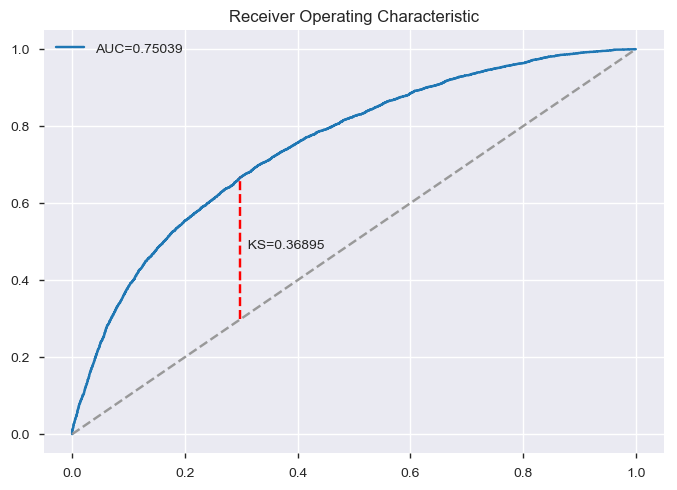

In [272]:
#显著性分析代码：p>|z|大于0.01的进入模型
#AUC（模型稳定性）和KS（区分能力）值计算
# Coef. :参数、系数
# Std. Err.：系数Coef.的方差的平方根standard error
# [95% Conf. Interval] 系数Coef.的95%置信区间
# P>|z|: 值小于或等于0.05表示结果显著。 
#两个变量协方差分析相关性强，保留Z值绝对值大（显著性强）的那个，如brand和list_price相关性强，就把Z值大的brand2留下
import os
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import auc,roc_curve
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose = True):
    included = list(initial_list)
 
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            print(new_column)
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
 
        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
 
result = stepwise_selection(X_train, Y_train)#模板改这里的参数X_train, Y_train
 
print('resulting features:')
print(result)

lr = sm.Logit(Y_train,sm.add_constant(X_train[result]))
rst = lr.fit()
print(rst.summary2())

y_predicted = rst.predict(sm.add_constant(X_train[result]))

fpr, tpr, thresholds = roc_curve(Y_train,y_predicted, pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  